In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

In [47]:
df = pd.read_csv('Attrition Data 2.csv')

In [48]:
df.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [49]:
df['Attrition'] = df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

In [50]:
df.describe()

Age    Attrition  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224          9.192517     2.912925   
std       9.135373     0.367863          8.106864     1.024165   
min      18.000000     0.000000          1.000000     1.000000   
25%      30.000000     0.000000          2.000000     2.000000   
50%      36.000000     0.000000          7.000000     3.000000   
75%      43.000000     0.000000         14.000000     4.000000   
max      60.000000     1.000000         29.000000     5.000000   

       EnvironmentSatisfaction  JobSatisfaction  MonthlyIncome  \
count              1470.000000      1470.000000    1470.000000   
mean                  2.721769         2.728571    6502.931293   
std                   1.093082         1.102846    4707.956783   
min                   1.000000         1.000000    1009.000000   
25%                   2.000000         2.000000    2911.000000   
50%                   3.000000         3.000000    4919.000000   
75%                   4.000000         4.000000    8379.000000   
max                   4.000000         4.000000   19999.000000   

       NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
count         1470.000000      1470.000000     1470.000000  
mean             2.693197         2.761224        7.008163  
std              2.498009         0.706476        6.126525  
min              0.000000         1.000000        0.000000  
25%              1.000000         2.000000        3.000000  
50%              2.000000         3.000000        5.000000  
75%              4.000000         3.000000        9.000000  
max              9.000000         4.000000       40.000000

# Exploratory Data Analysis (EDA)

In [51]:
df.dtypes

Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

0    1233
1     237
Name: Attrition, dtype: int64


<Axes: >

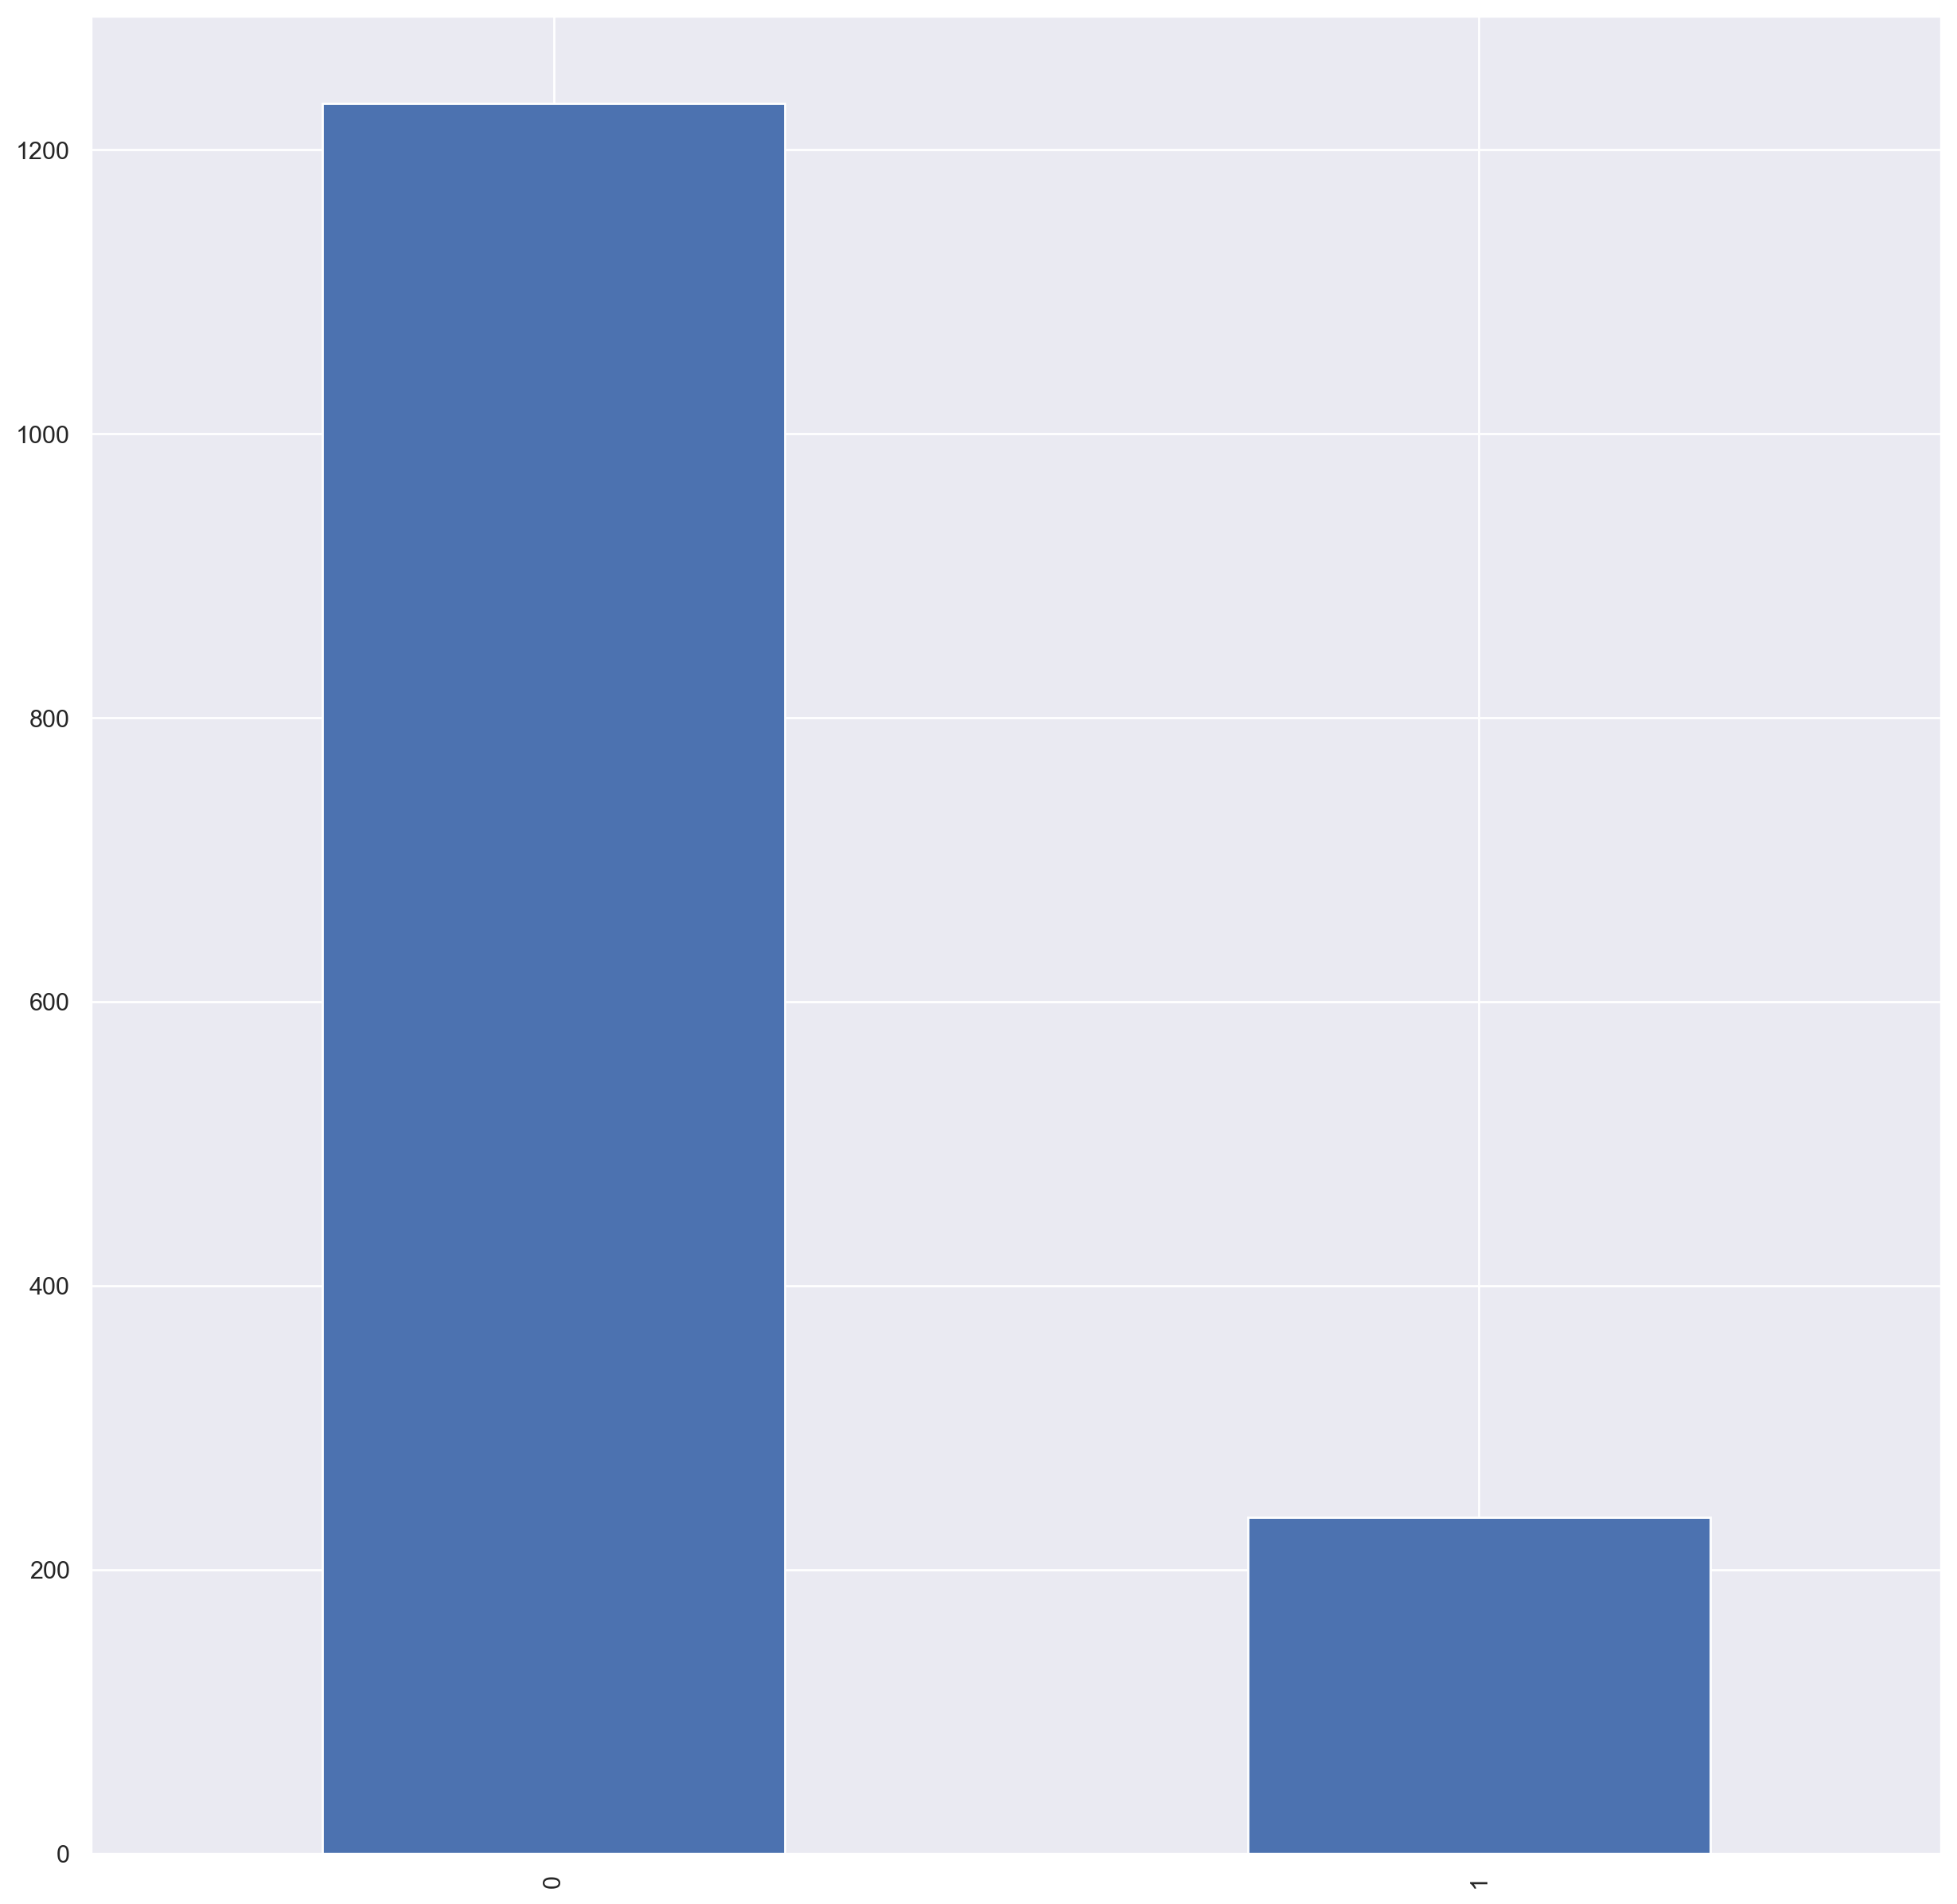

In [52]:
print(df.Attrition.value_counts())
df.Attrition.value_counts().plot(kind='bar')

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<Axes: >

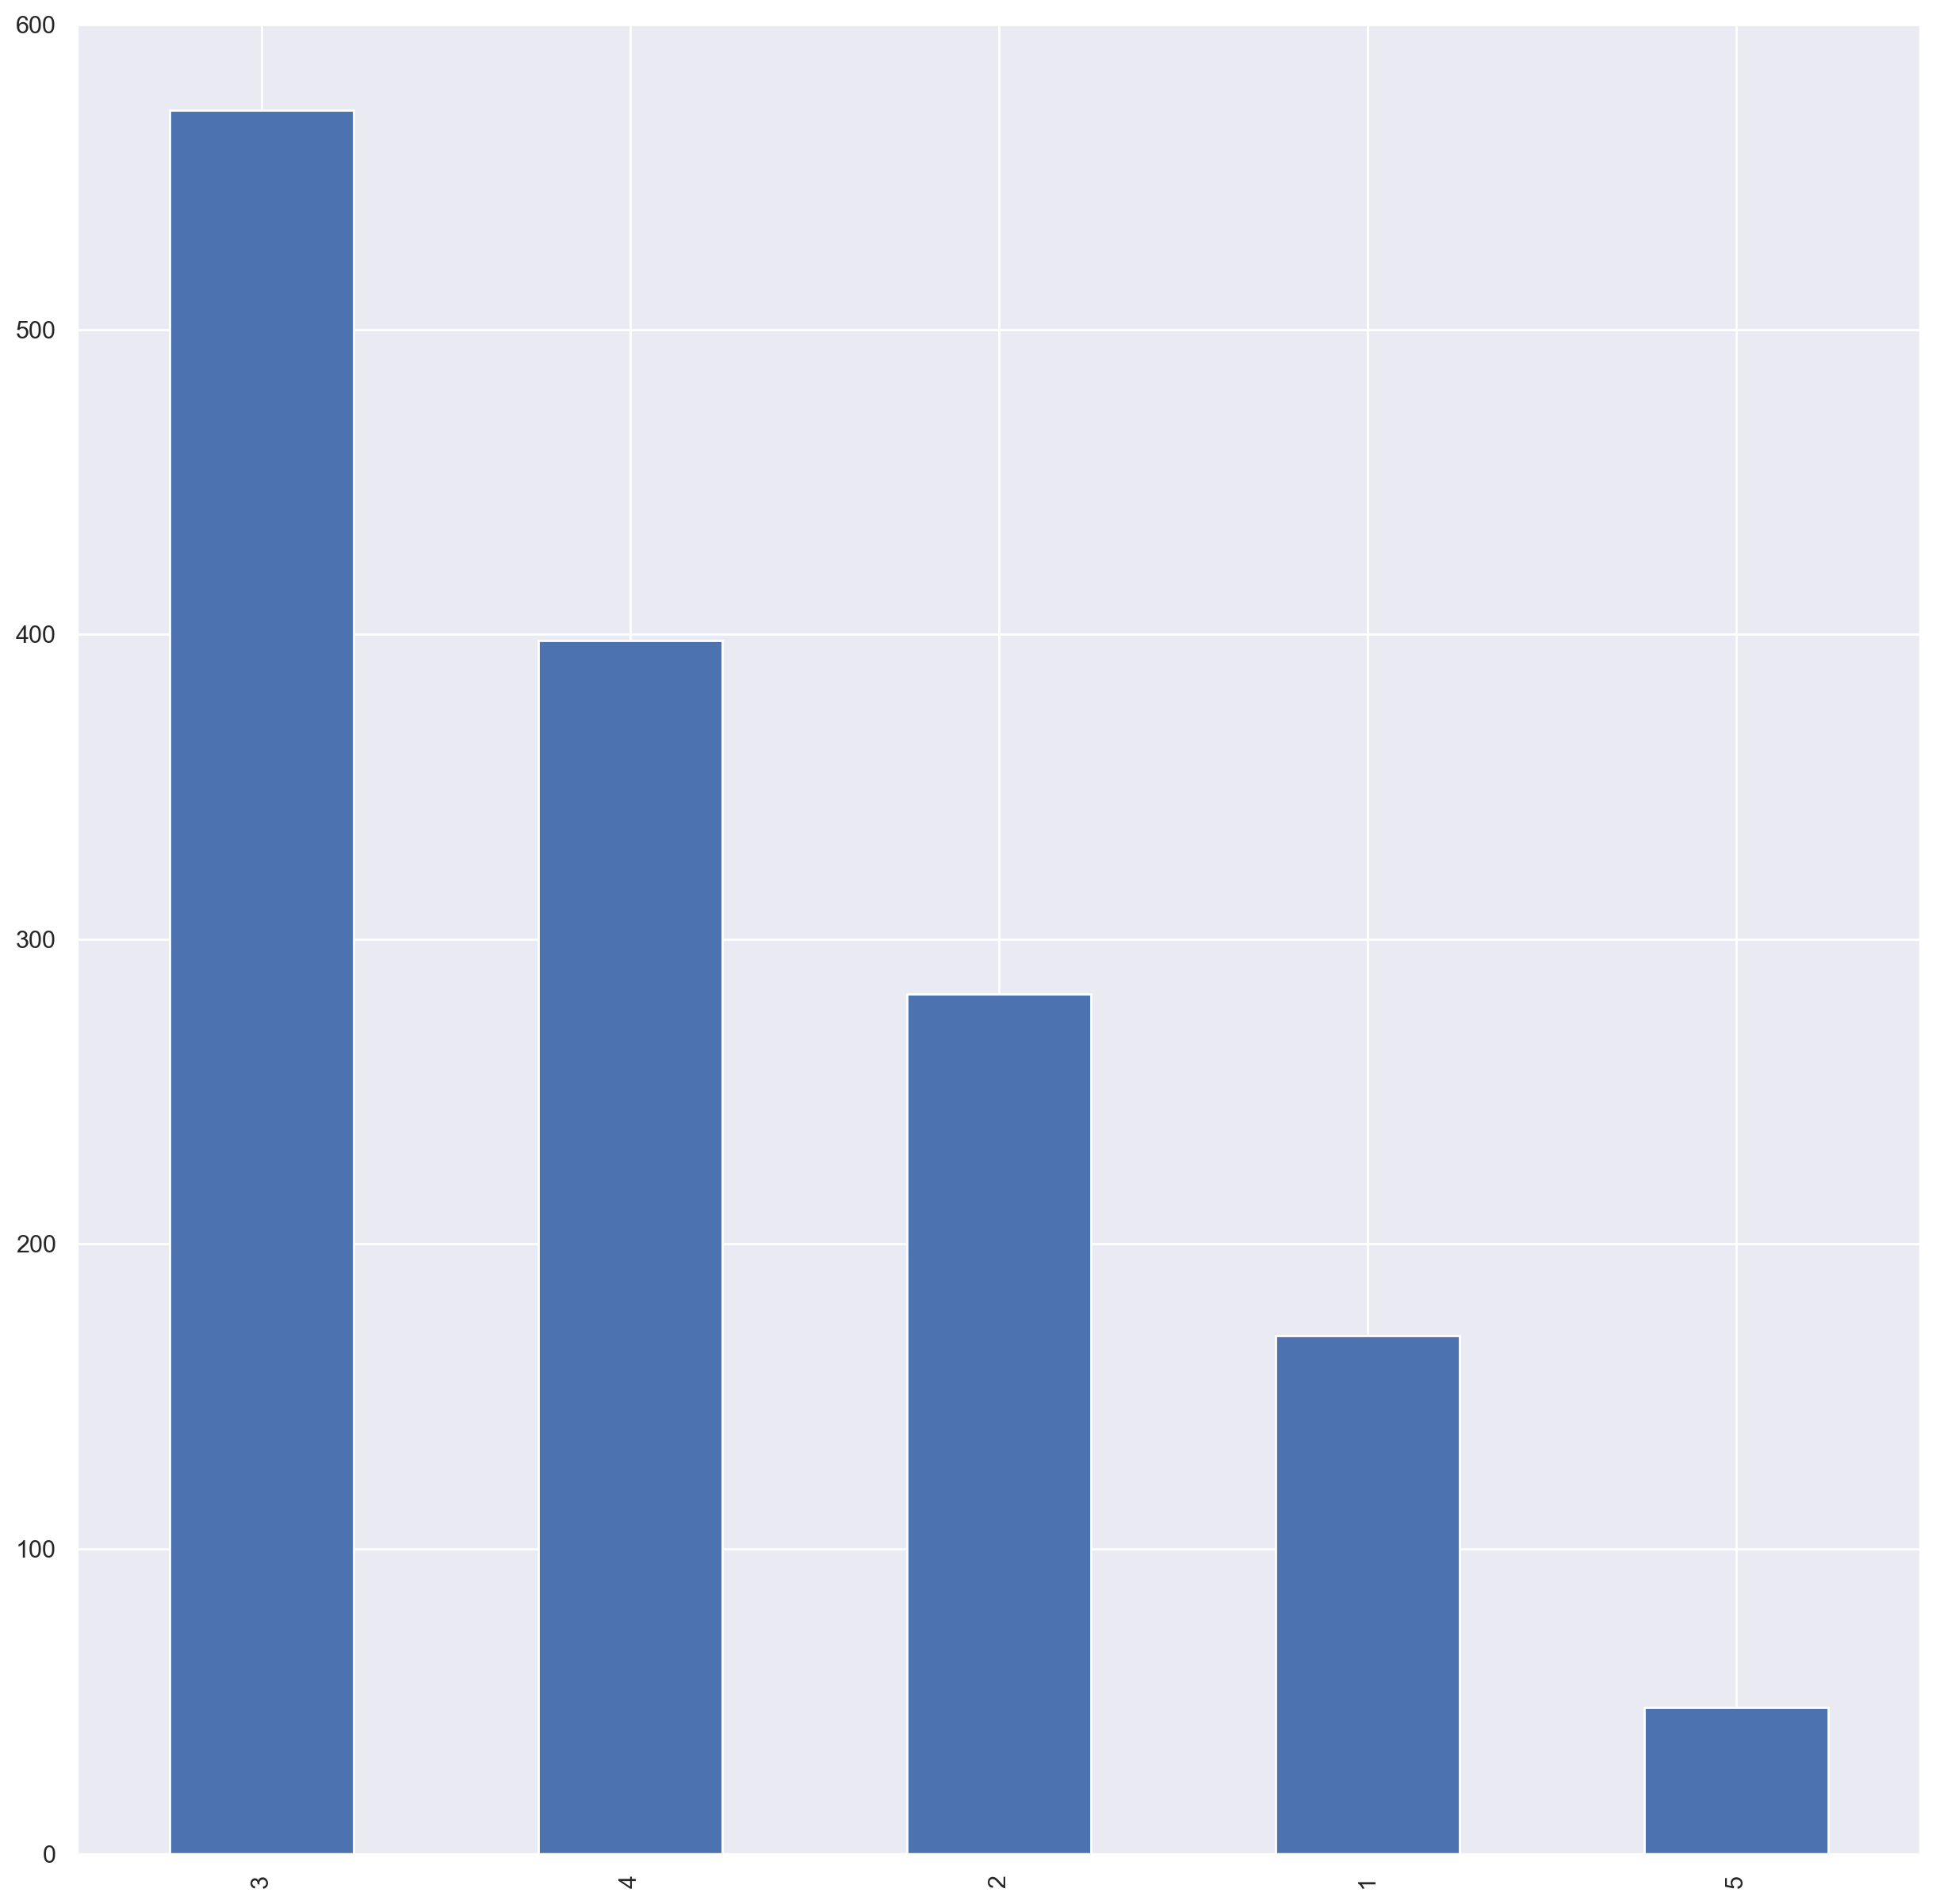

In [53]:
print(df.Education.value_counts())
df.Education.value_counts().plot(kind='bar')

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<Axes: >

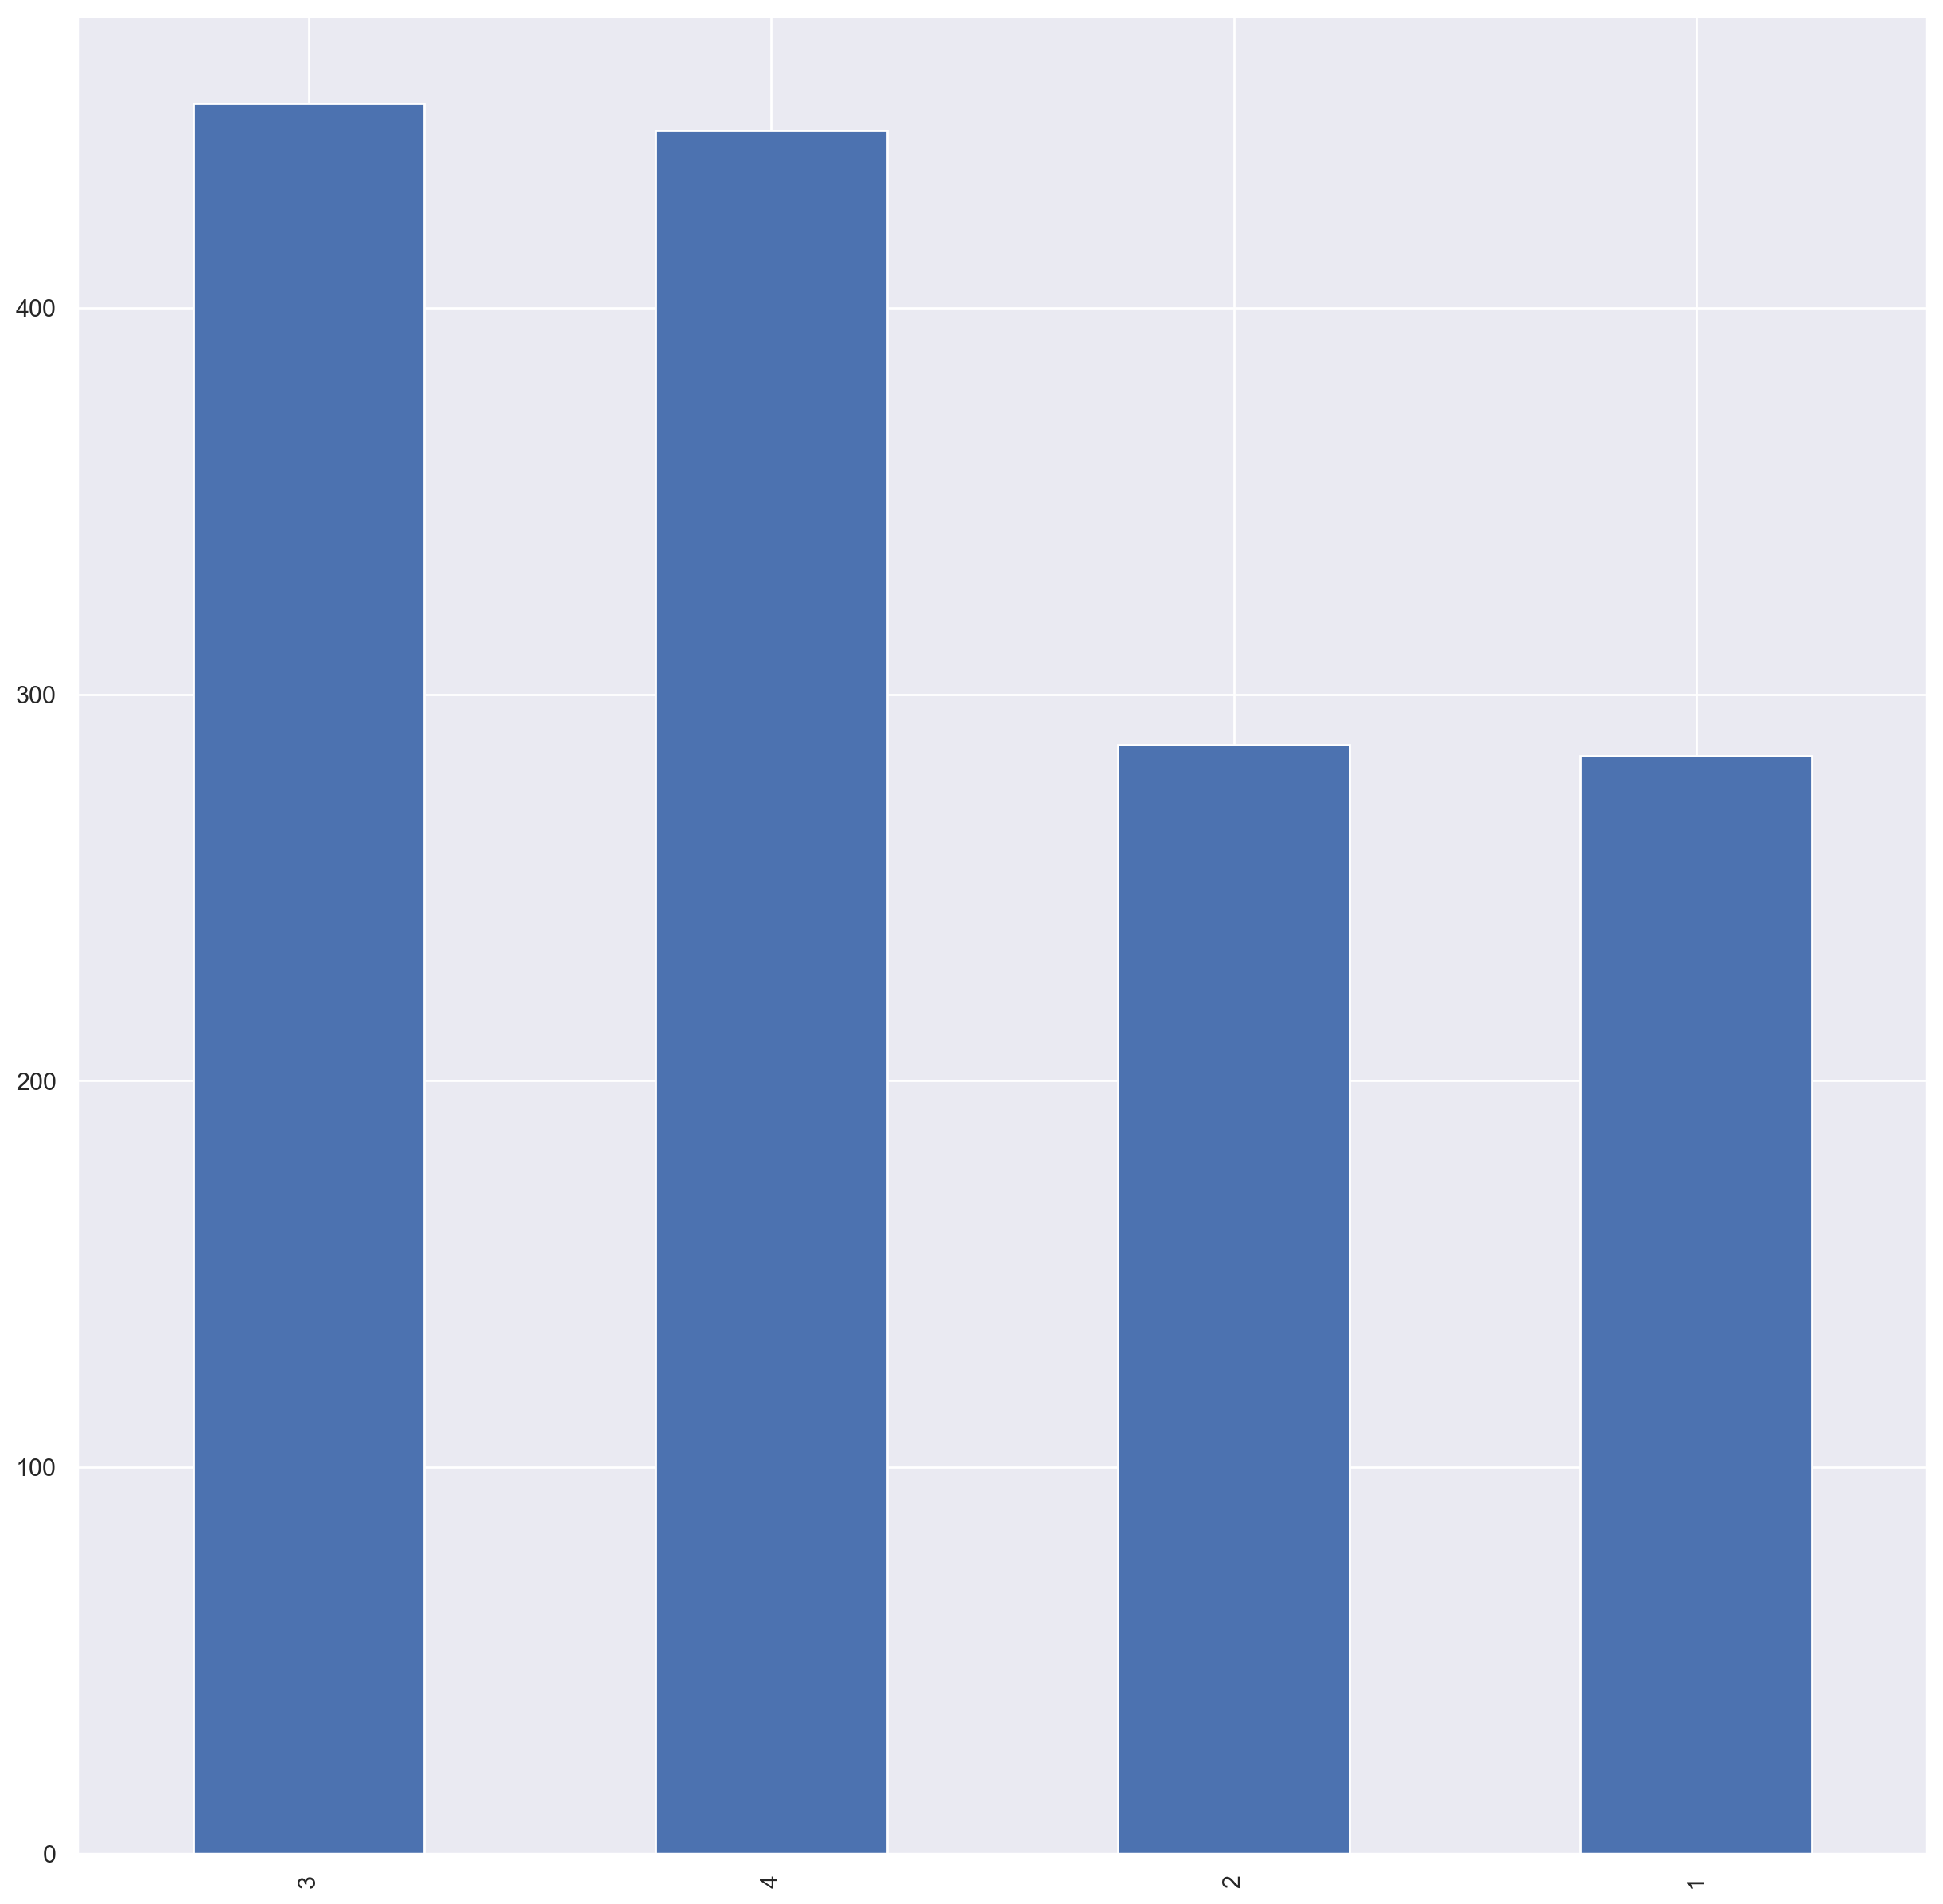

In [54]:
print(df.EnvironmentSatisfaction.value_counts())
df.EnvironmentSatisfaction.value_counts().plot(kind='bar')

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


<Axes: >

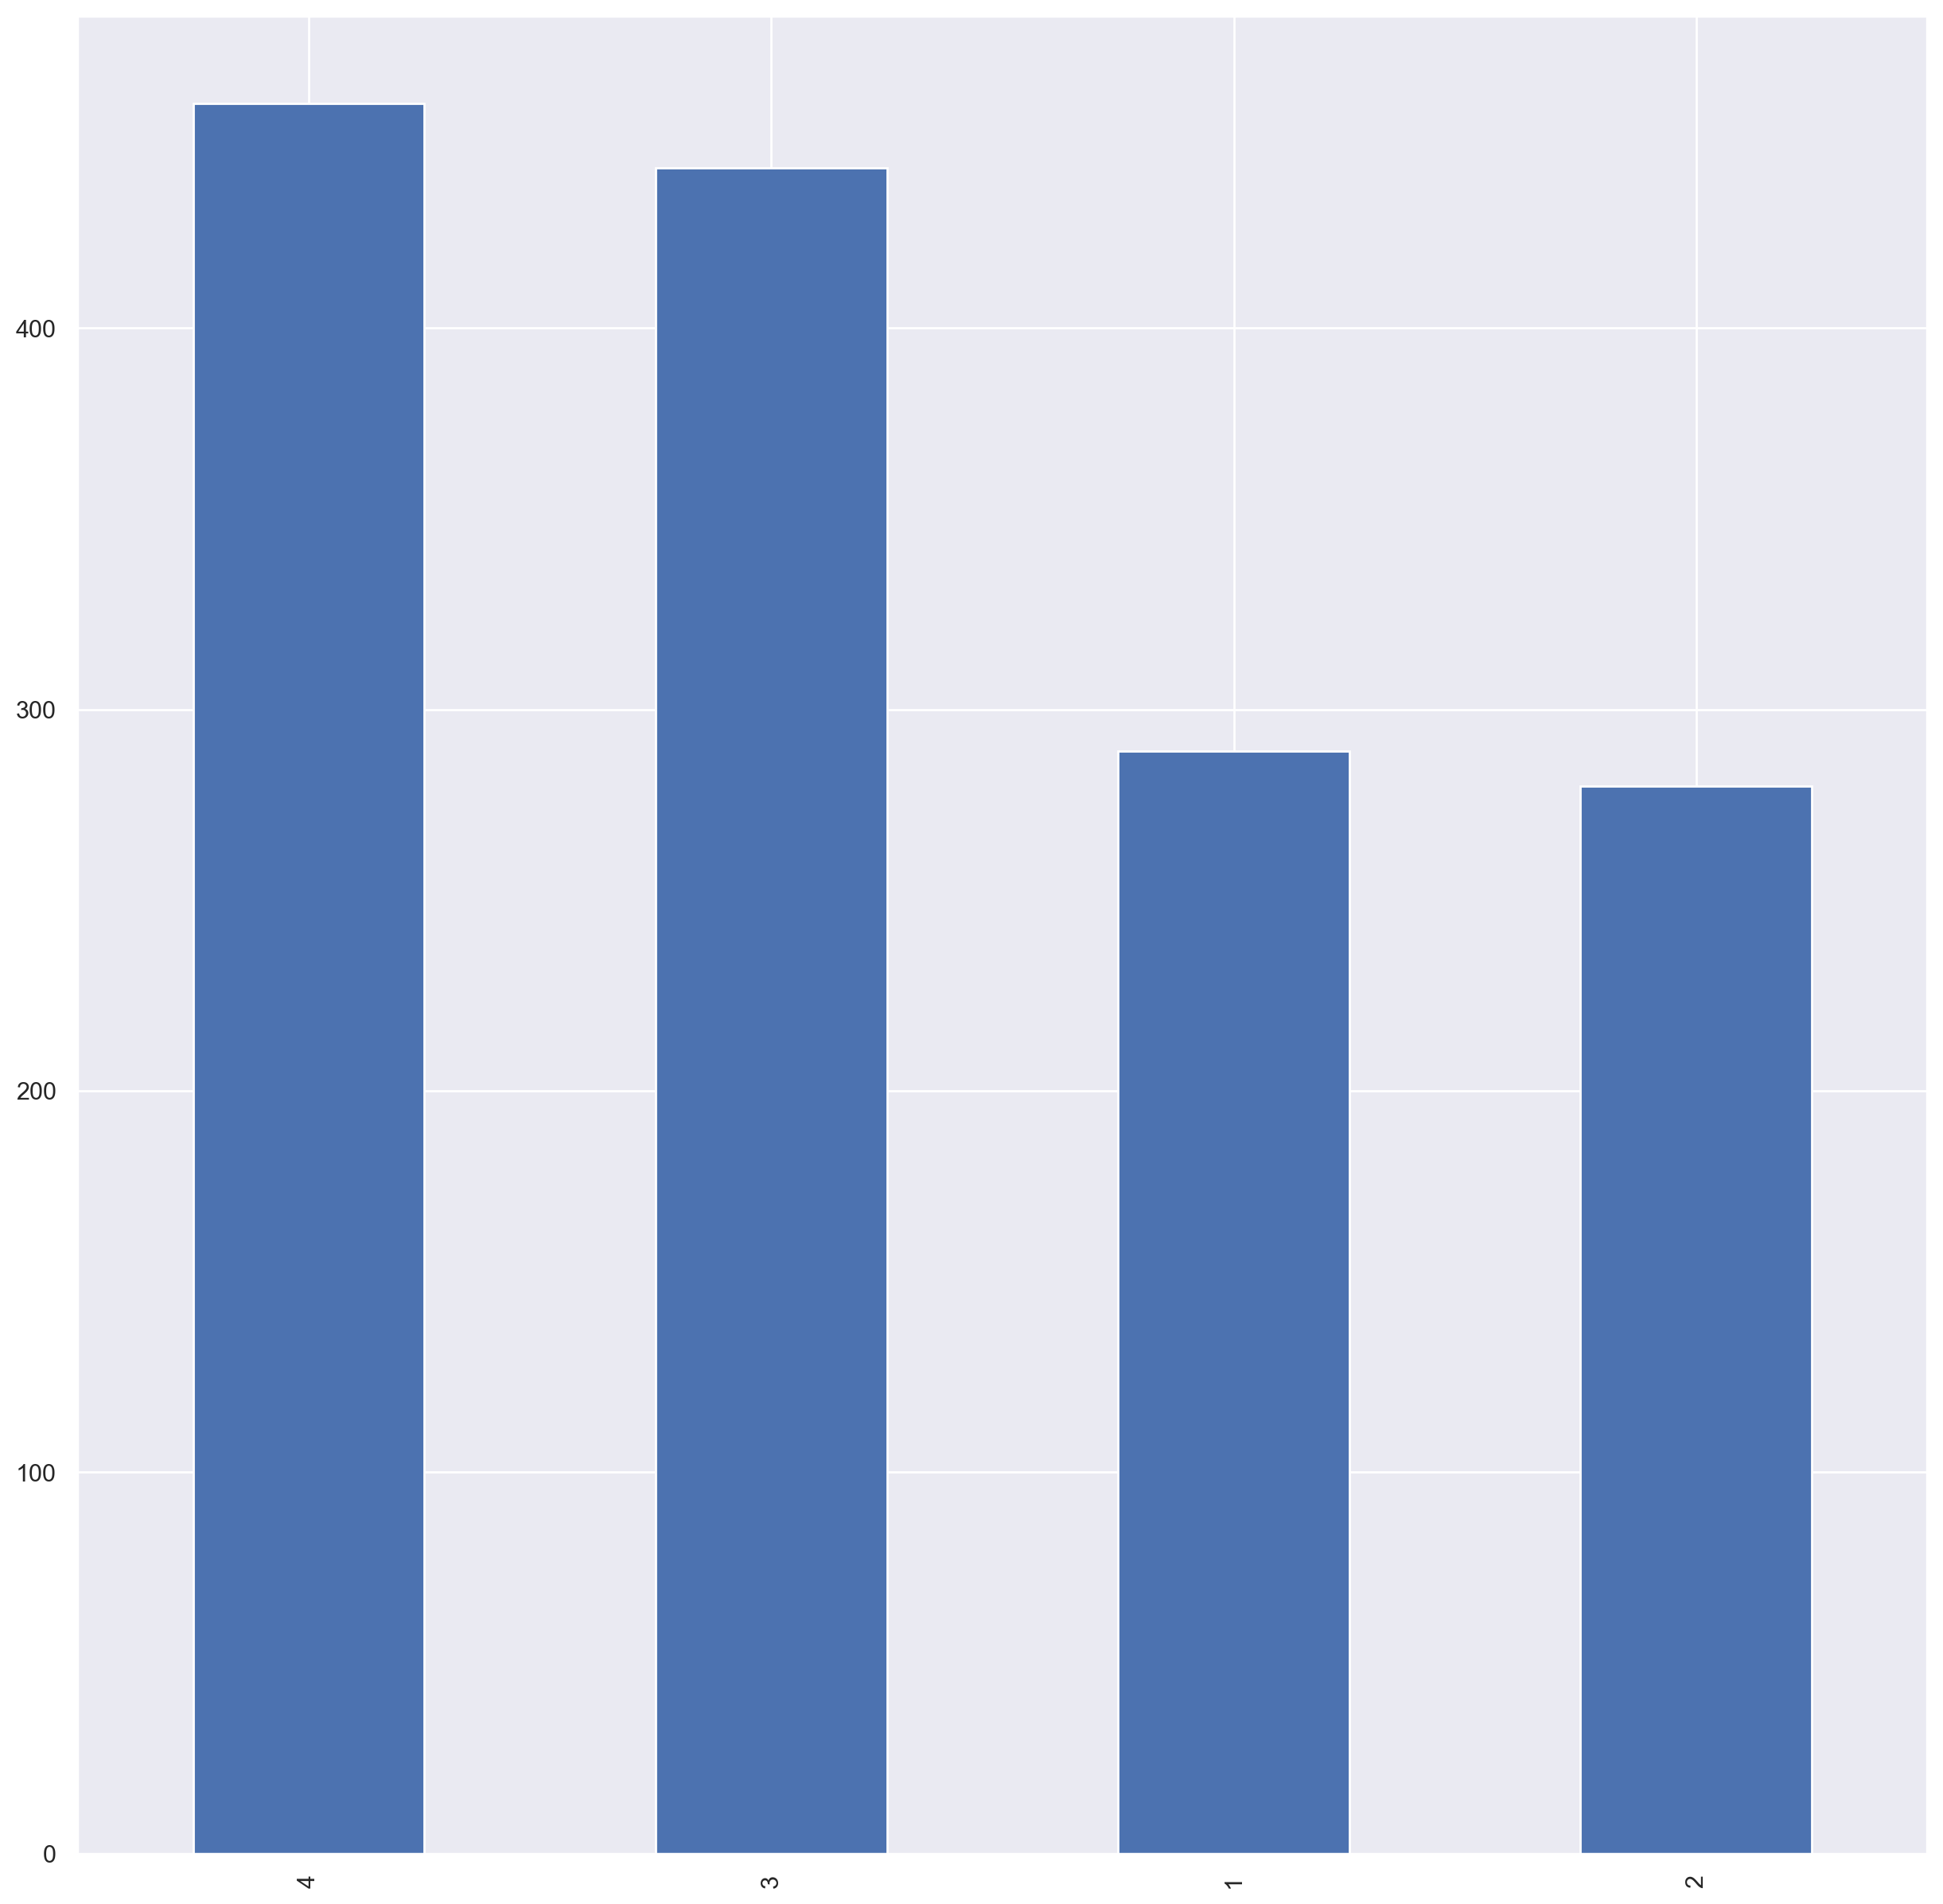

In [55]:
print(df.JobSatisfaction.value_counts())
df.JobSatisfaction.value_counts().plot(kind='bar')

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<Axes: >

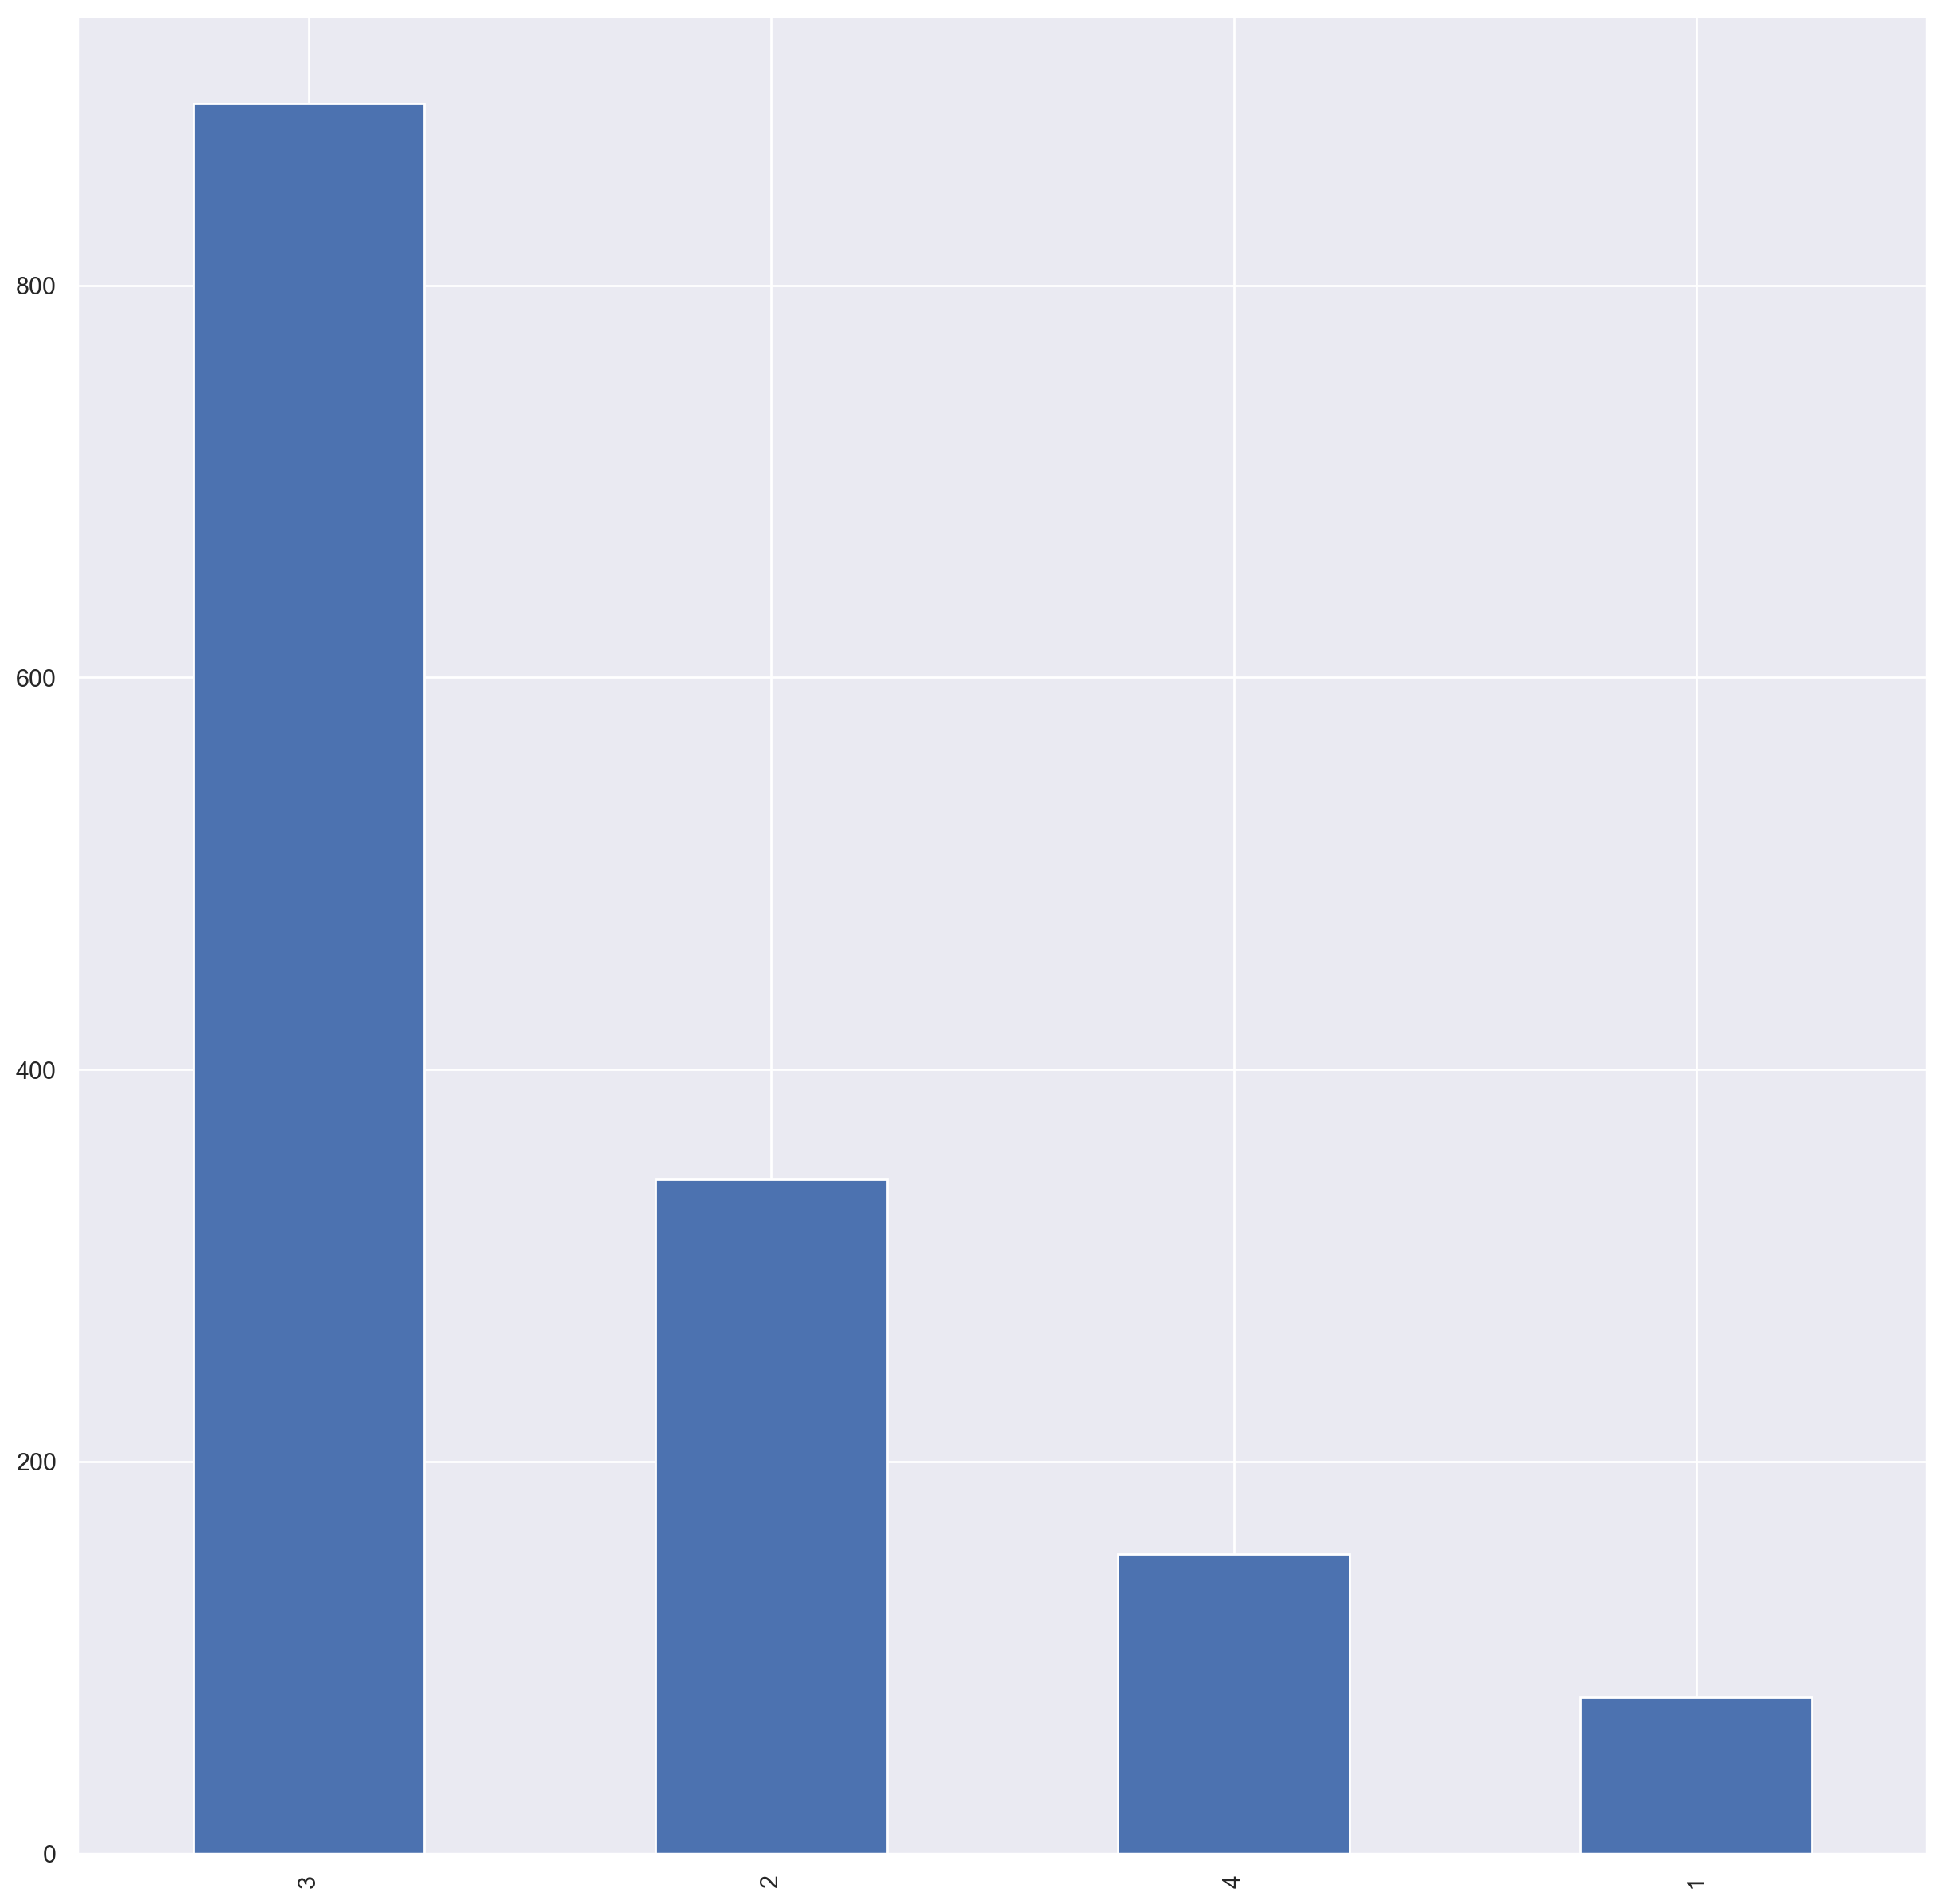

In [56]:
print(df.WorkLifeBalance.value_counts())
df.WorkLifeBalance.value_counts().plot(kind='bar')

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<Axes: >

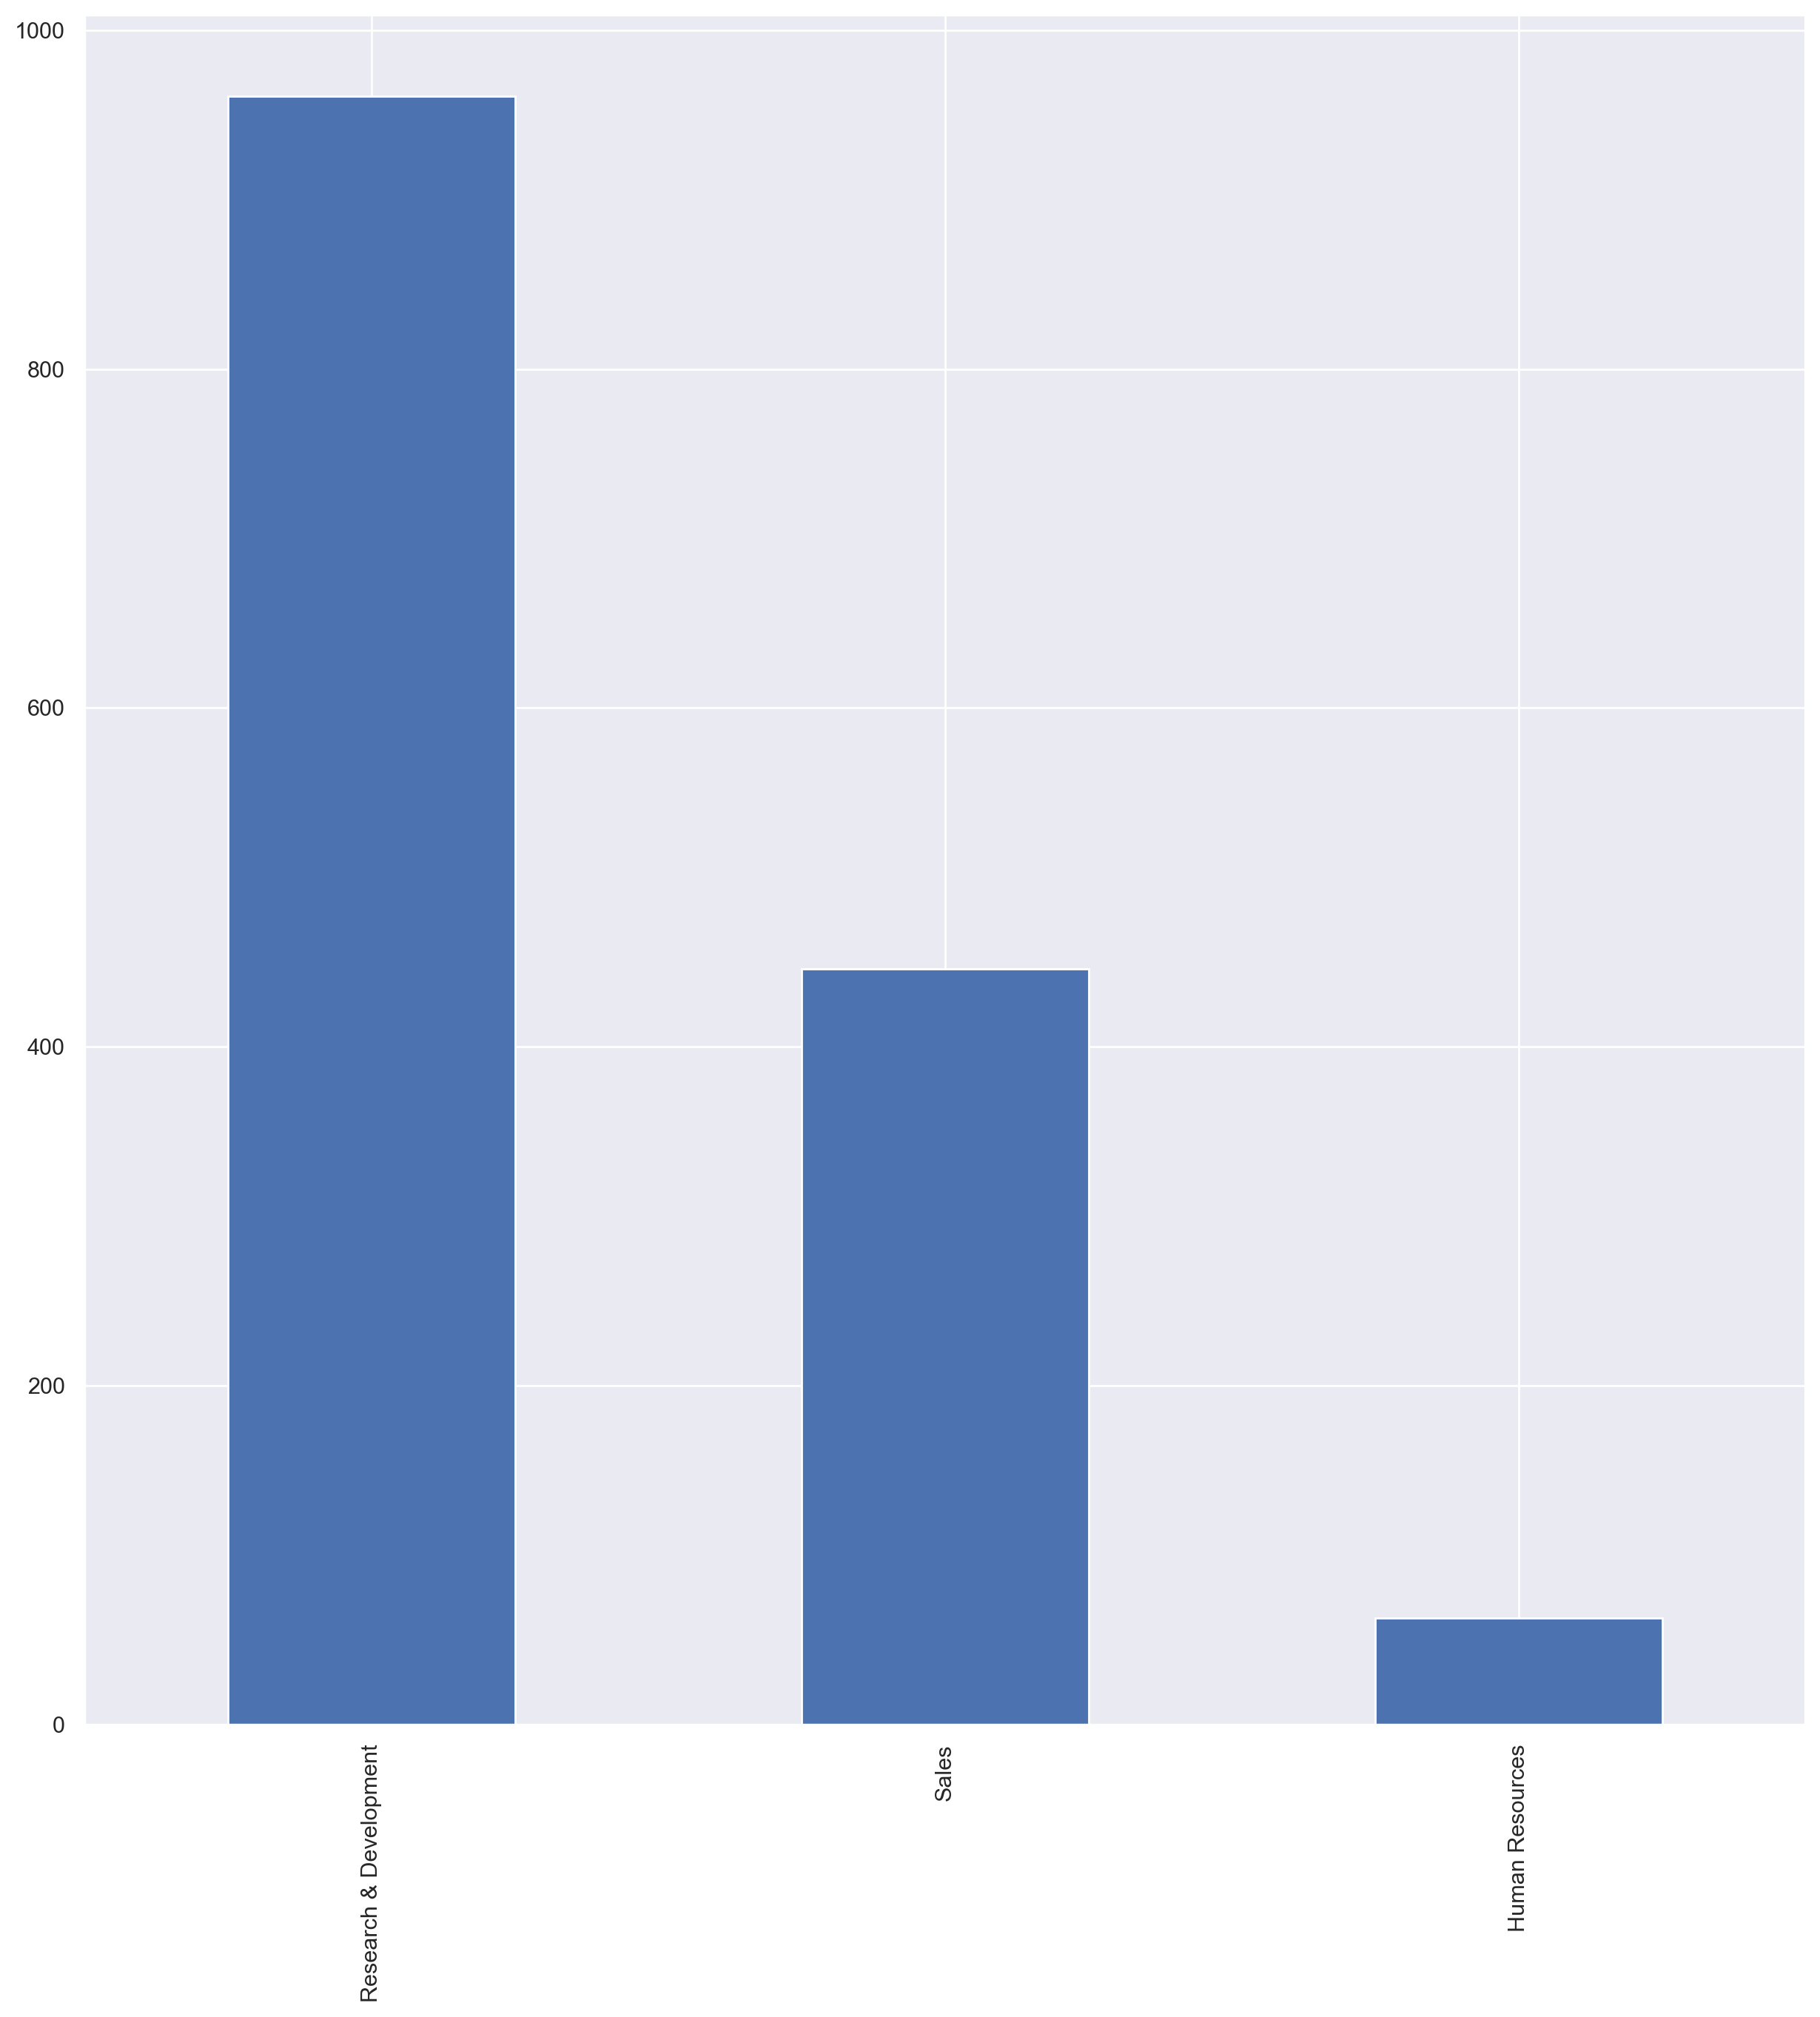

In [57]:
print(df.Department.value_counts())
df.Department.value_counts().plot(kind='bar')

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<Axes: >

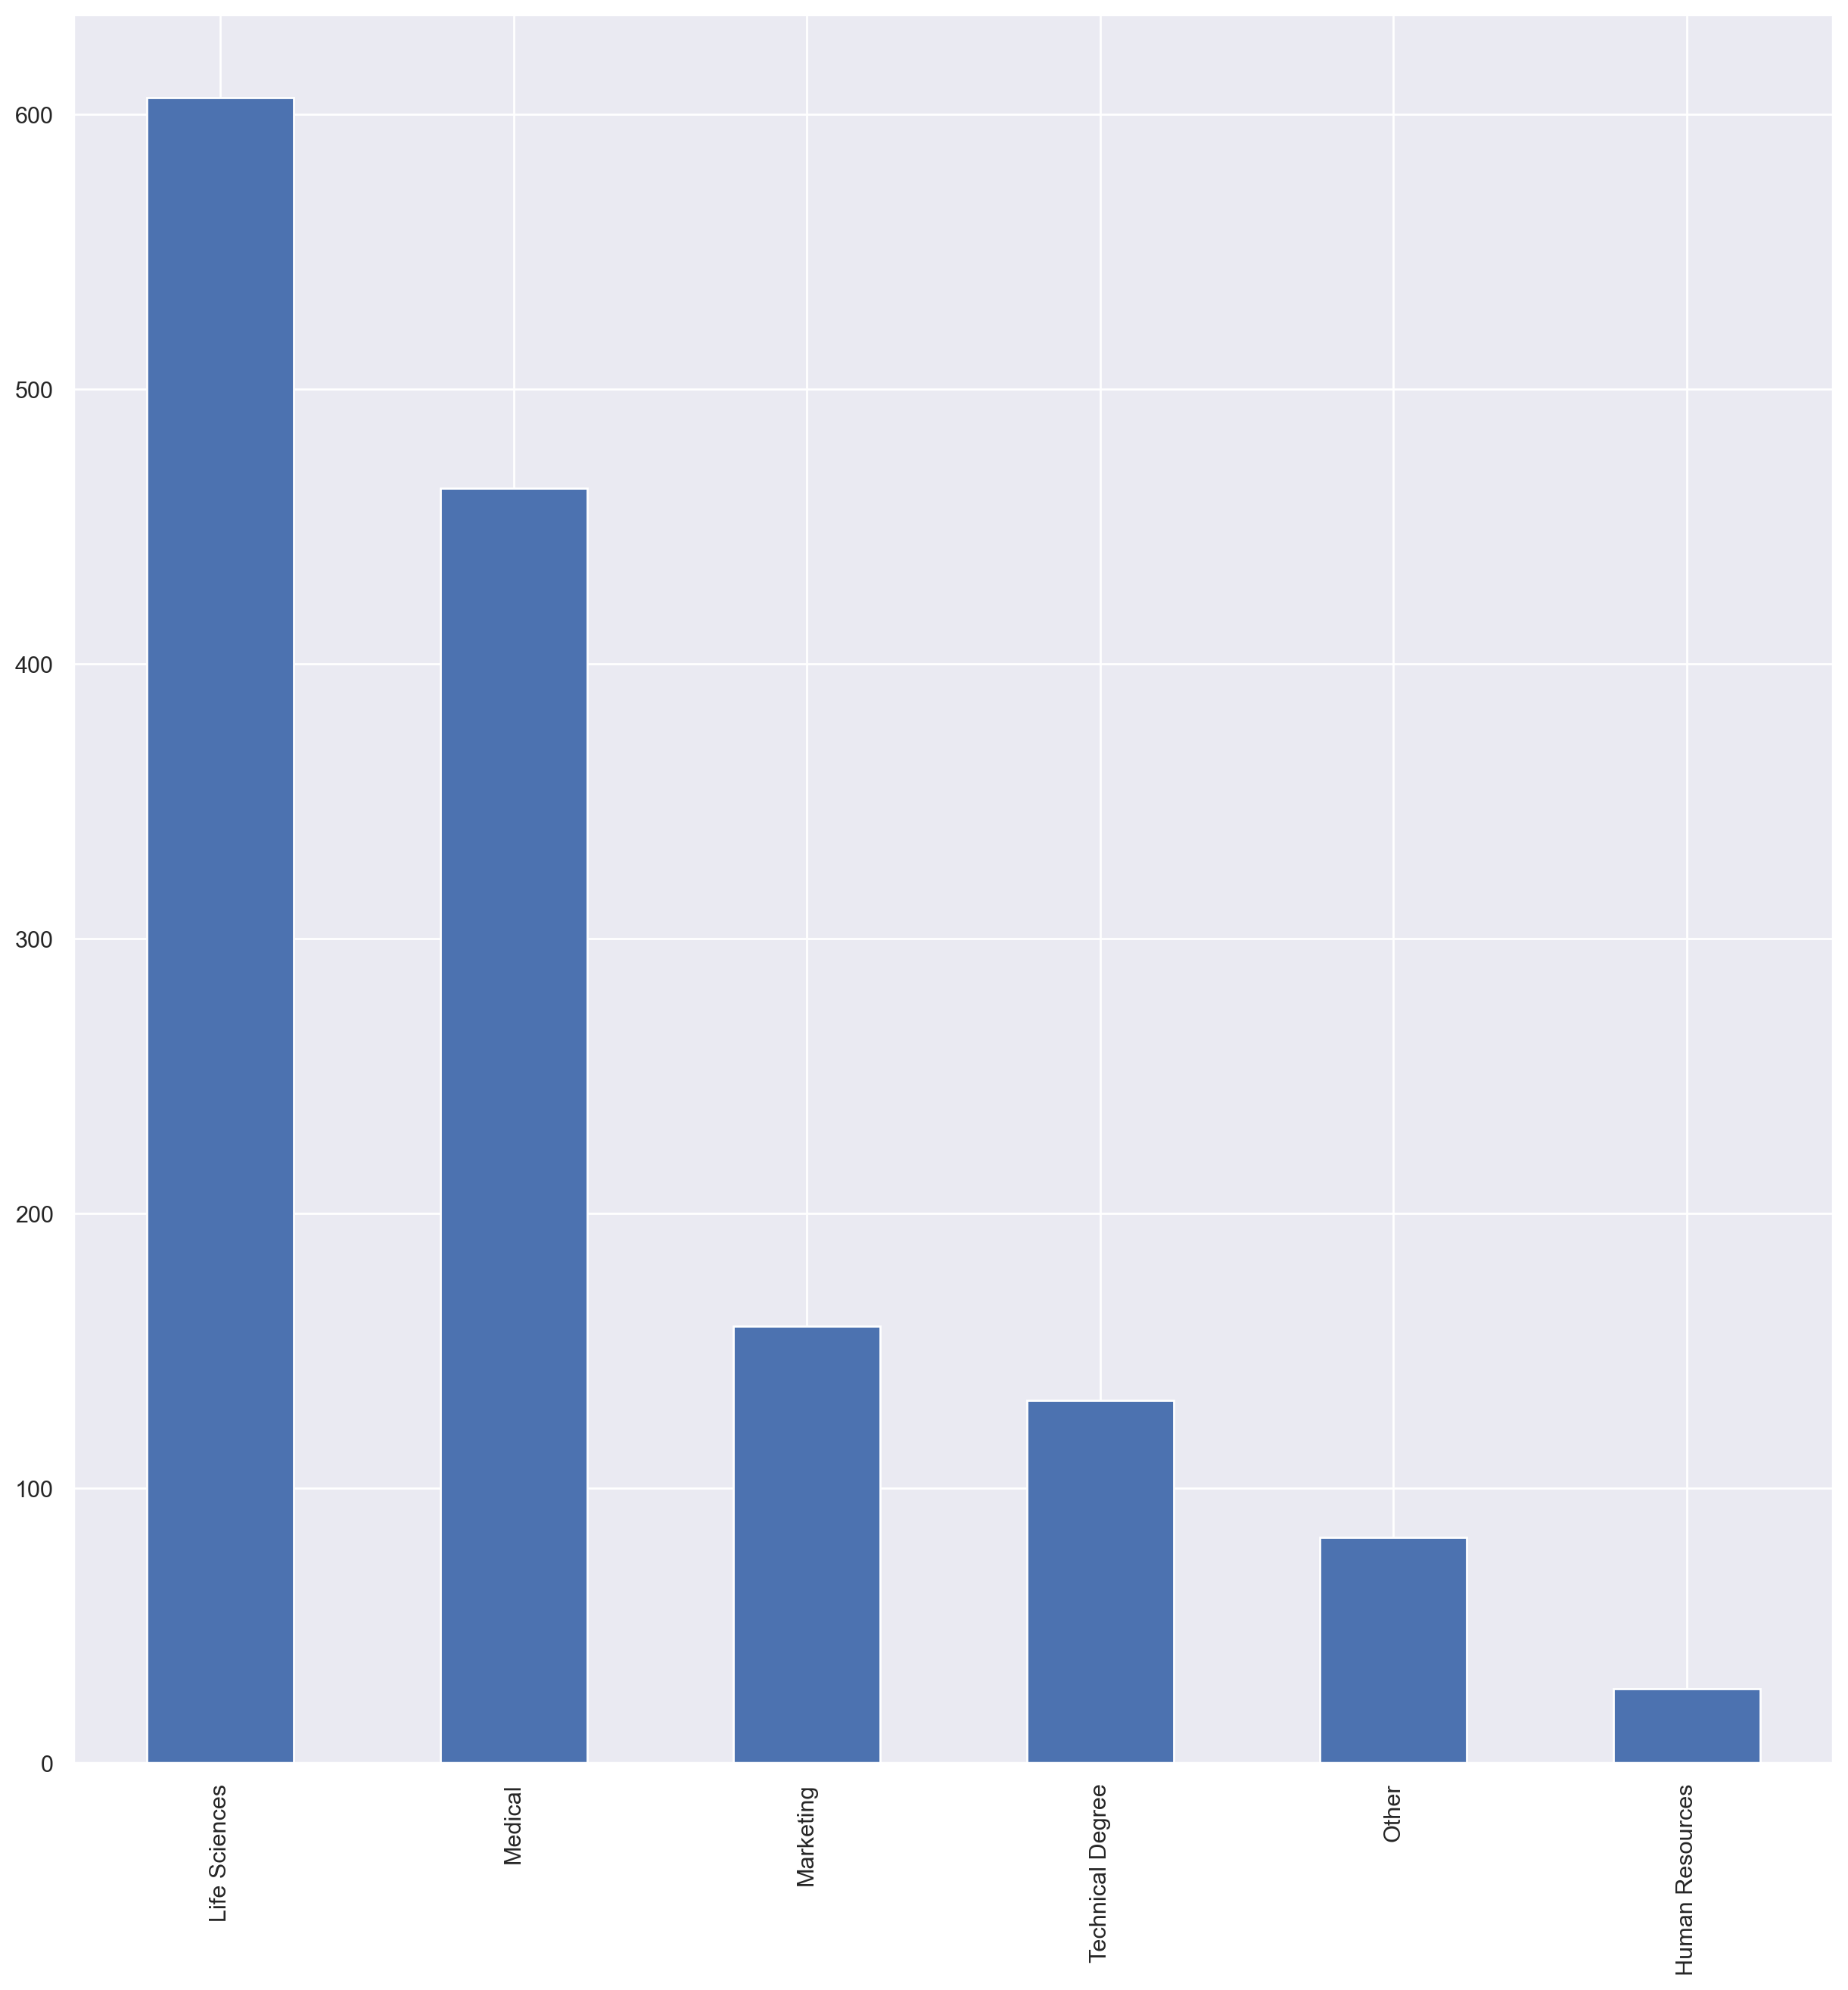

In [58]:
print(df.EducationField.value_counts())
df.EducationField.value_counts().plot(kind='bar')

In [59]:
df1 = pd.get_dummies(df, ['Department', 'EducationField', 'MaritalStatus'])

<Axes: >

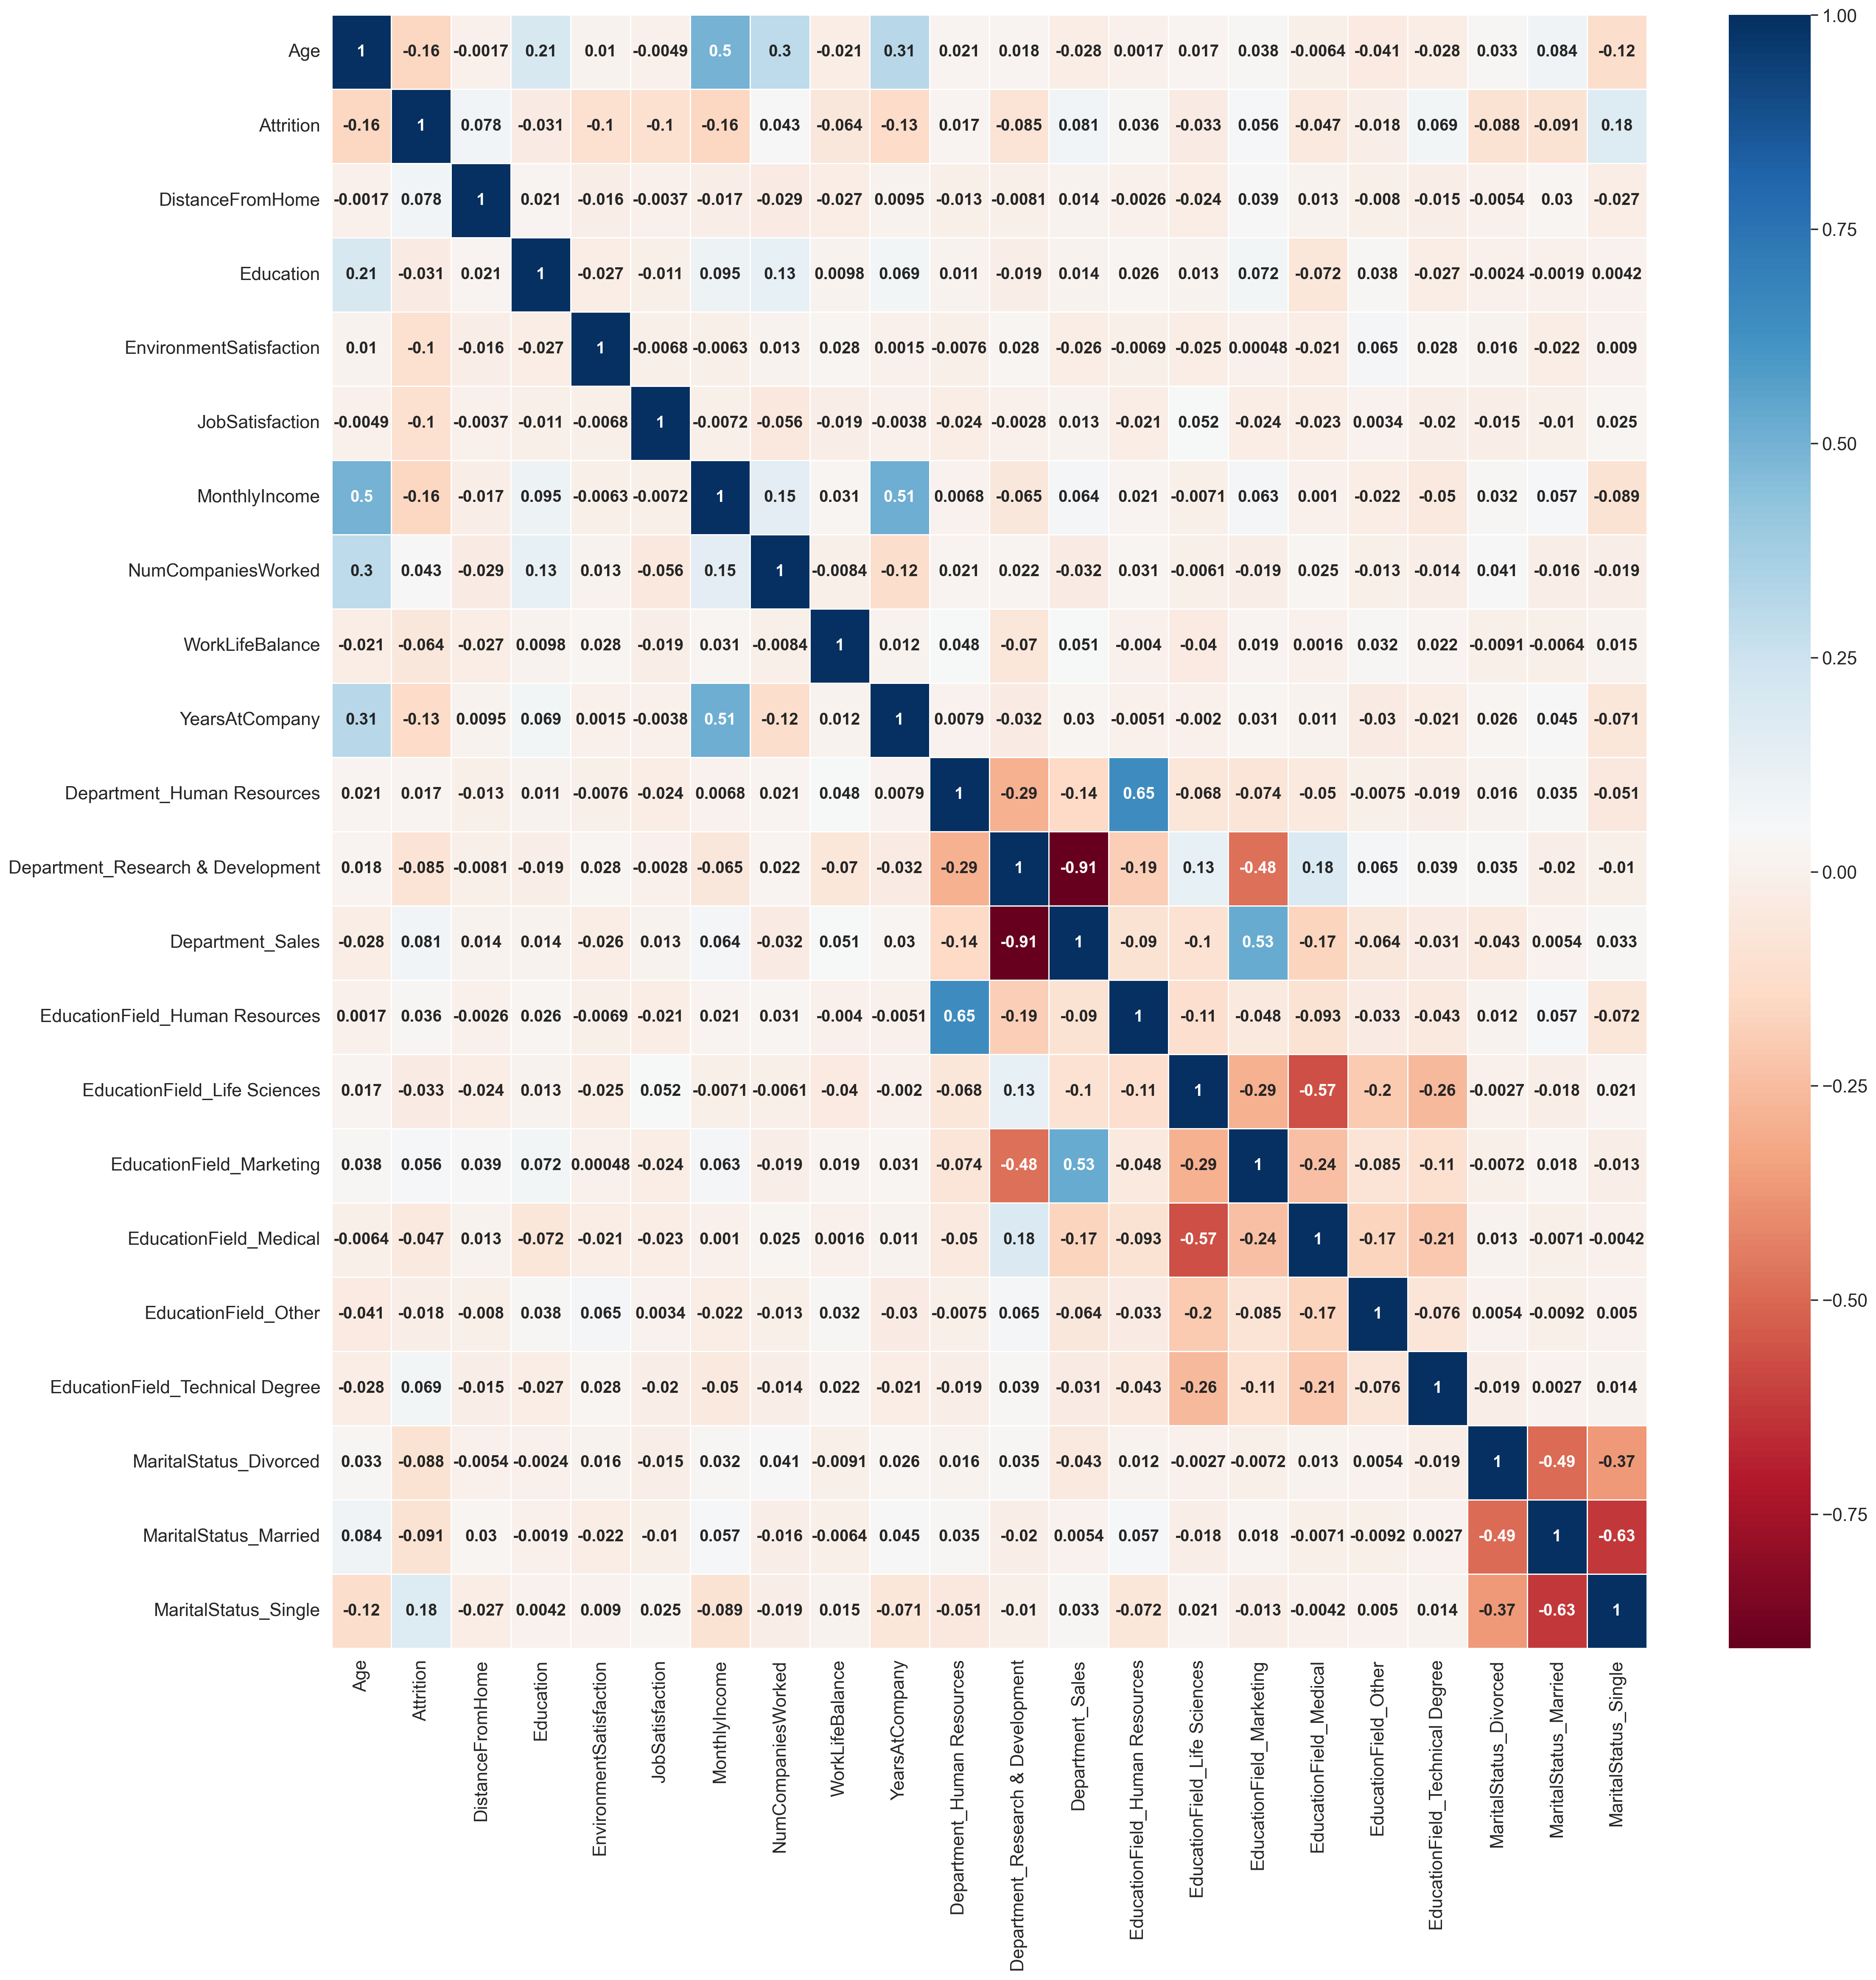

In [60]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.4)
sns.heatmap(df1.corr(), 
            annot=True,
            linewidth=0.5,
            annot_kws={"size":14, "weight": "bold"},
            cmap="RdBu")


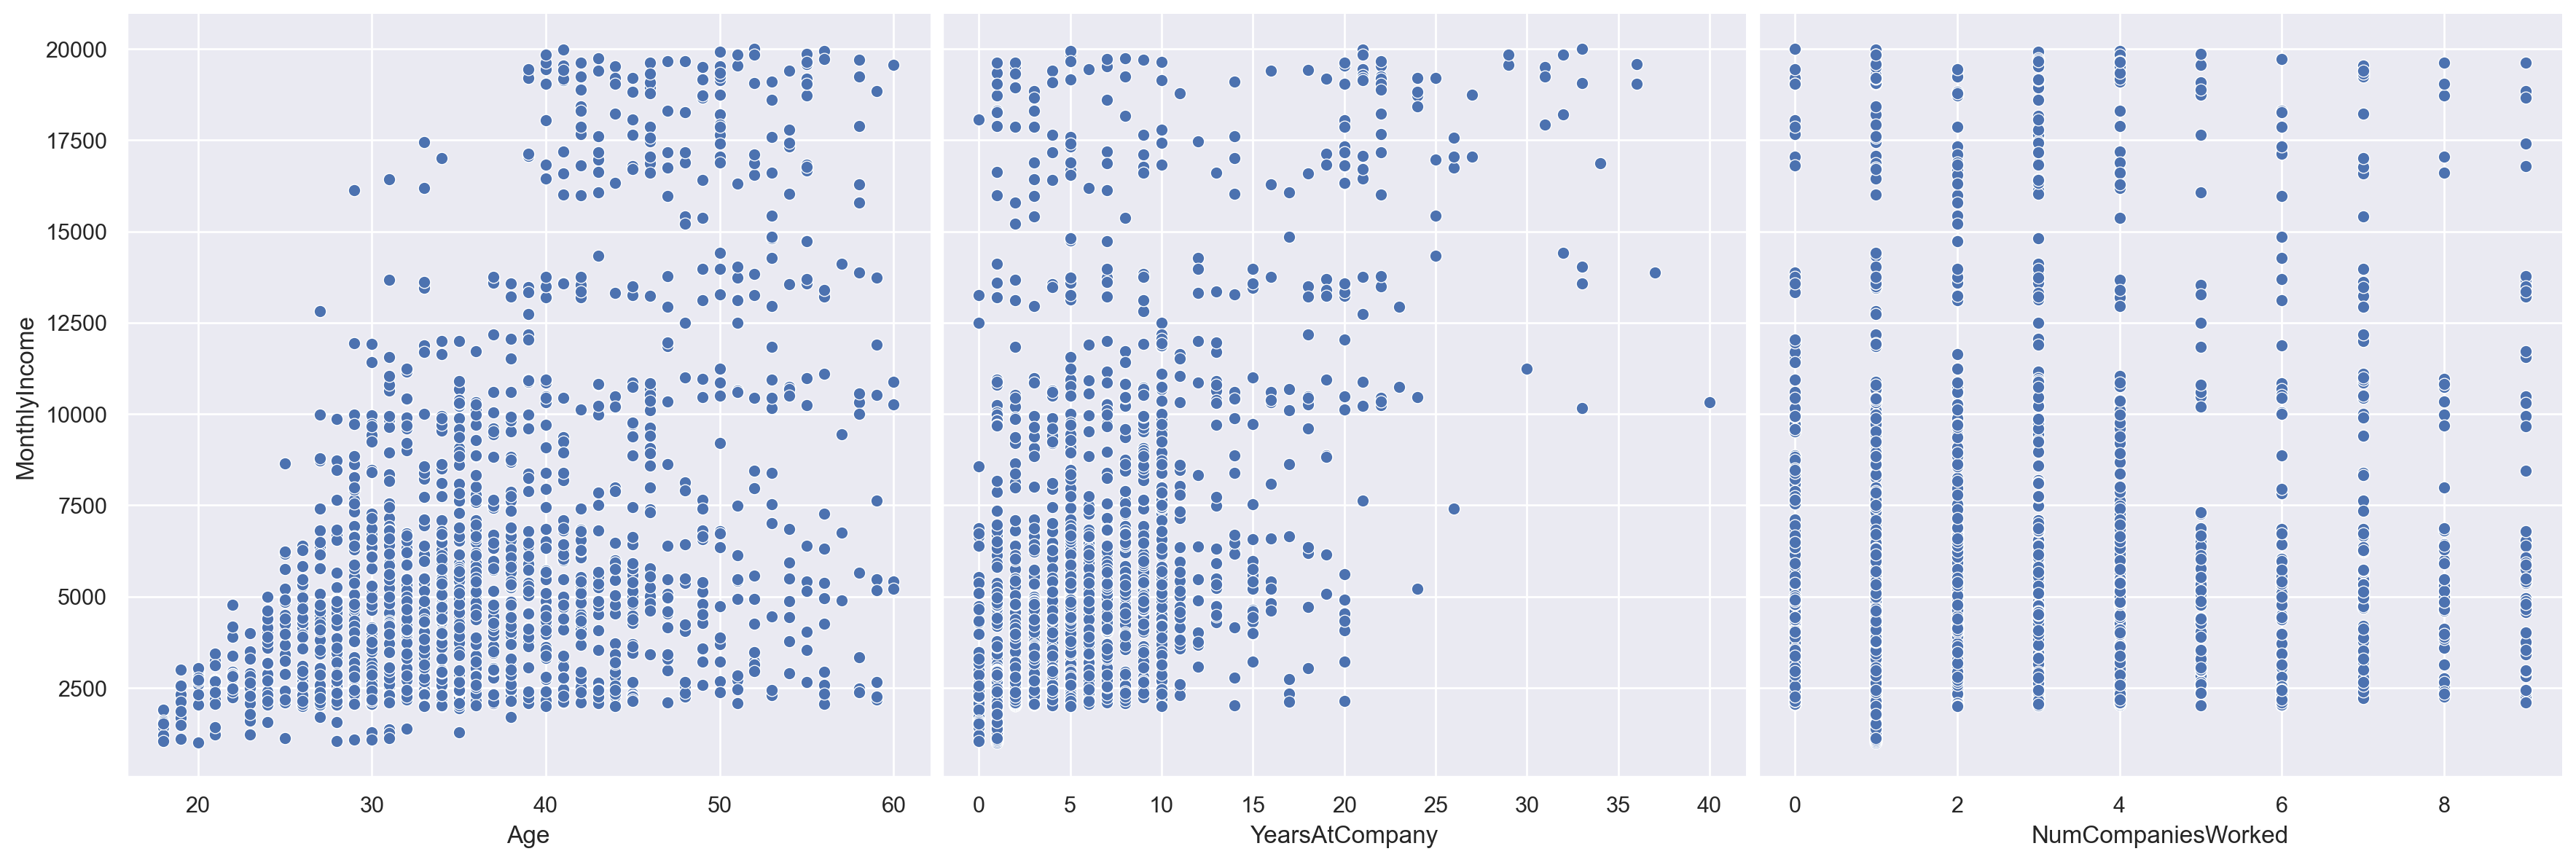

In [61]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(df,x_vars=['Age','YearsAtCompany','NumCompaniesWorked'],
             y_vars=['MonthlyIncome'],
            height=6)

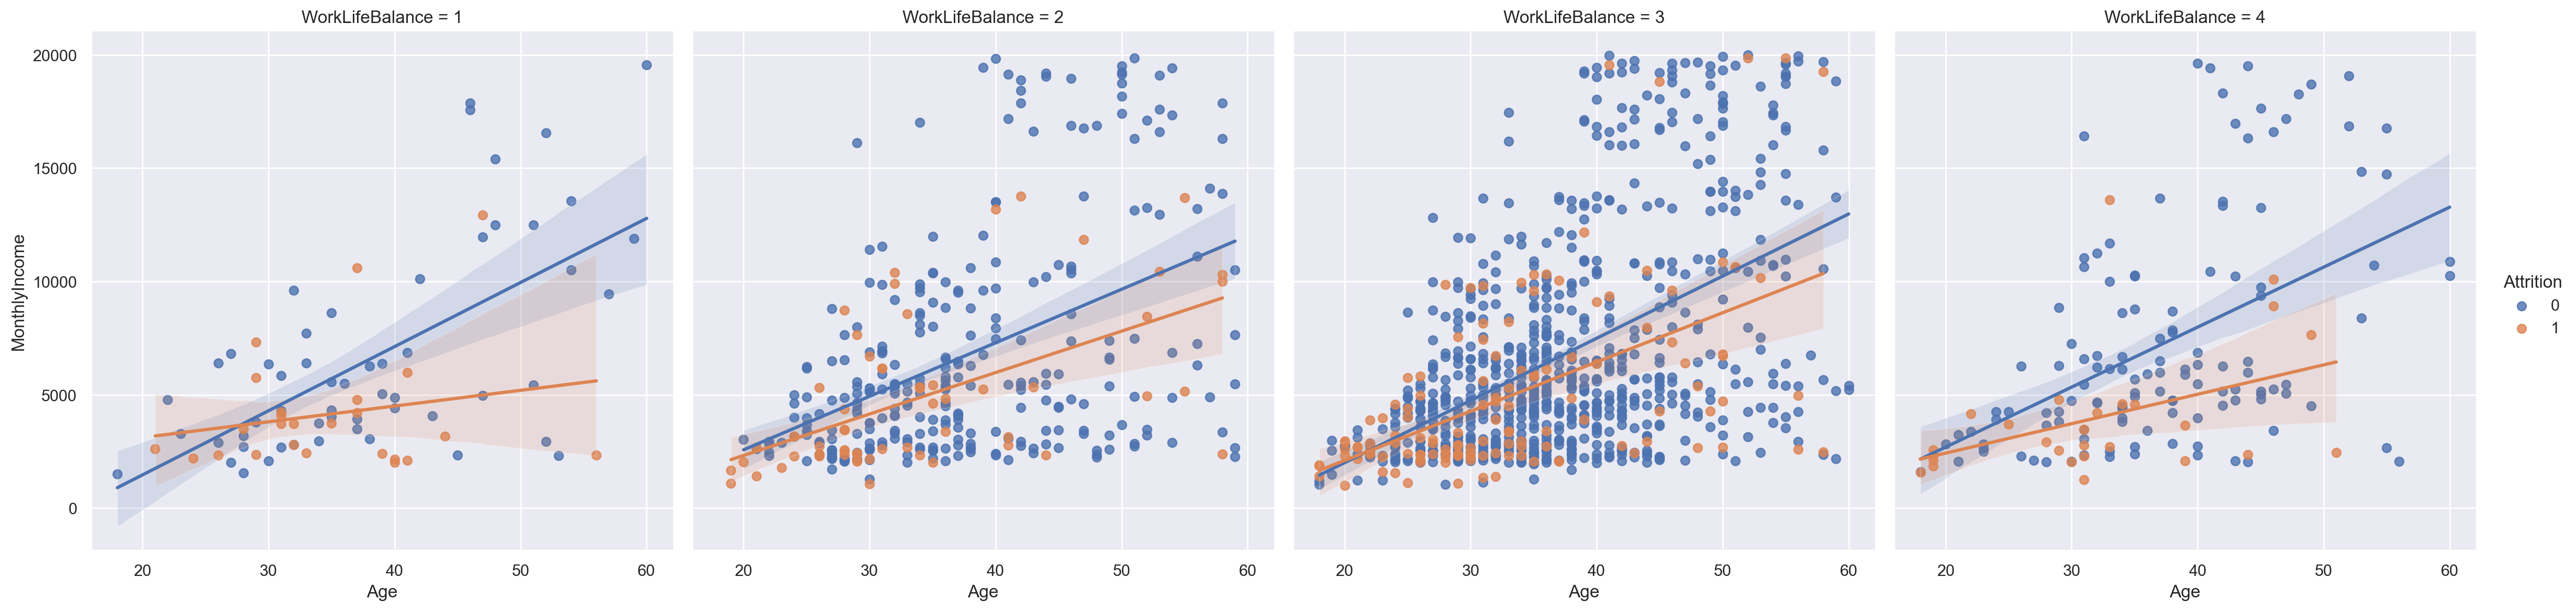

In [62]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="Age", y="MonthlyIncome", data=df, col="WorkLifeBalance", hue="Attrition", height=6)


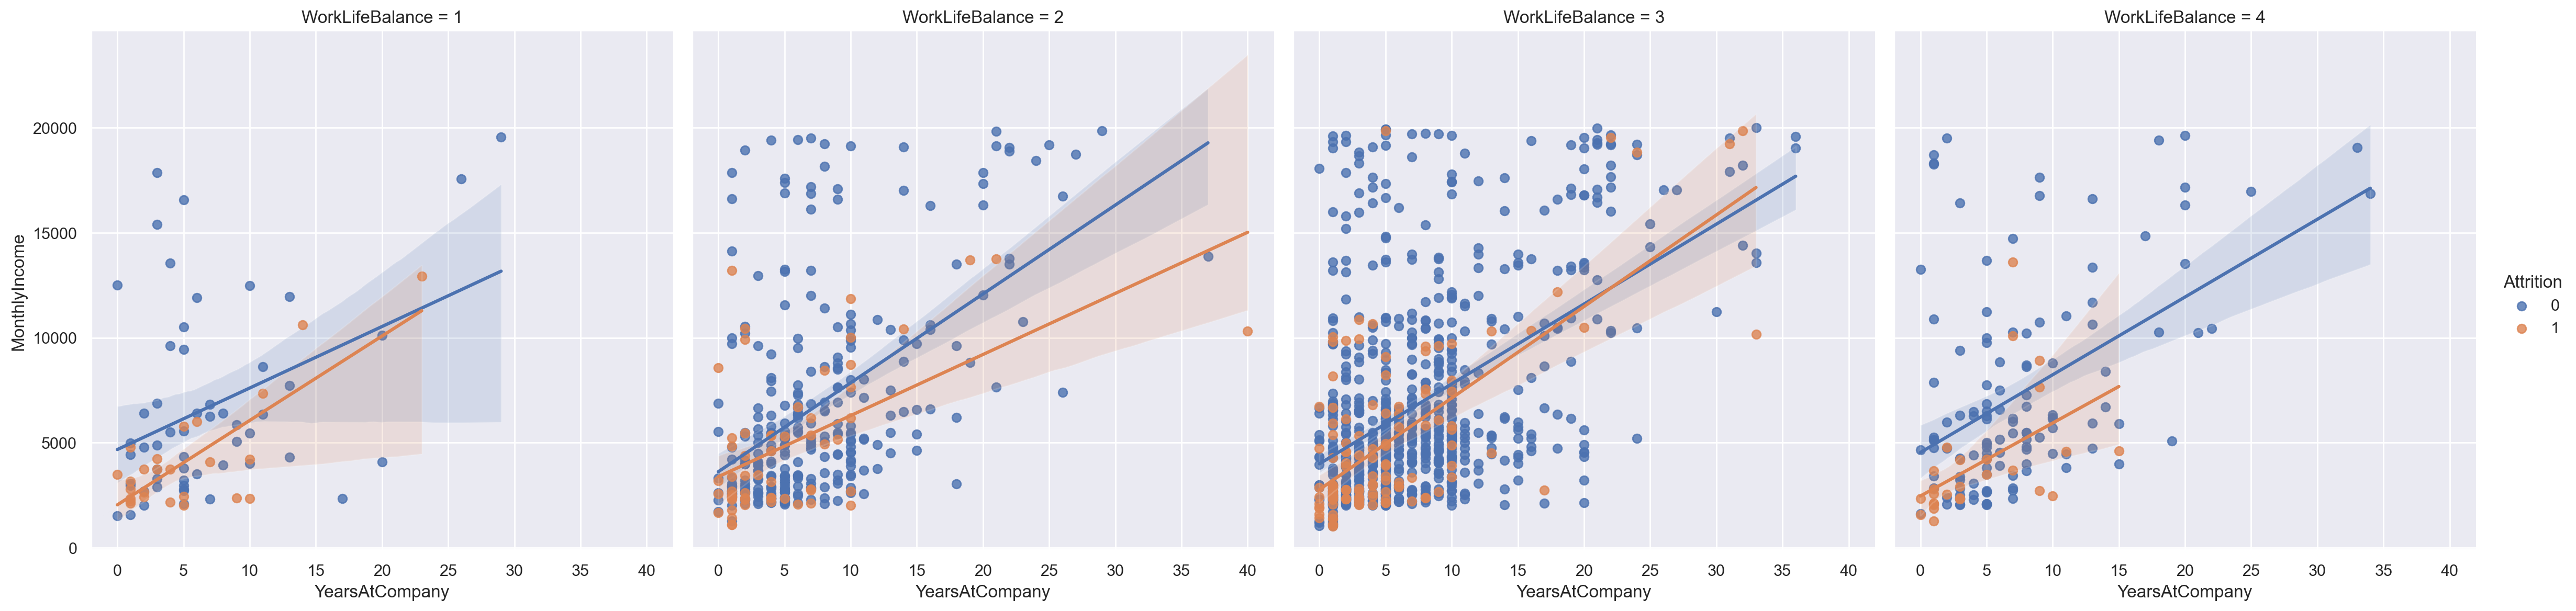

In [63]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="YearsAtCompany", y="MonthlyIncome", data=df, col="WorkLifeBalance", hue="Attrition", height=6);

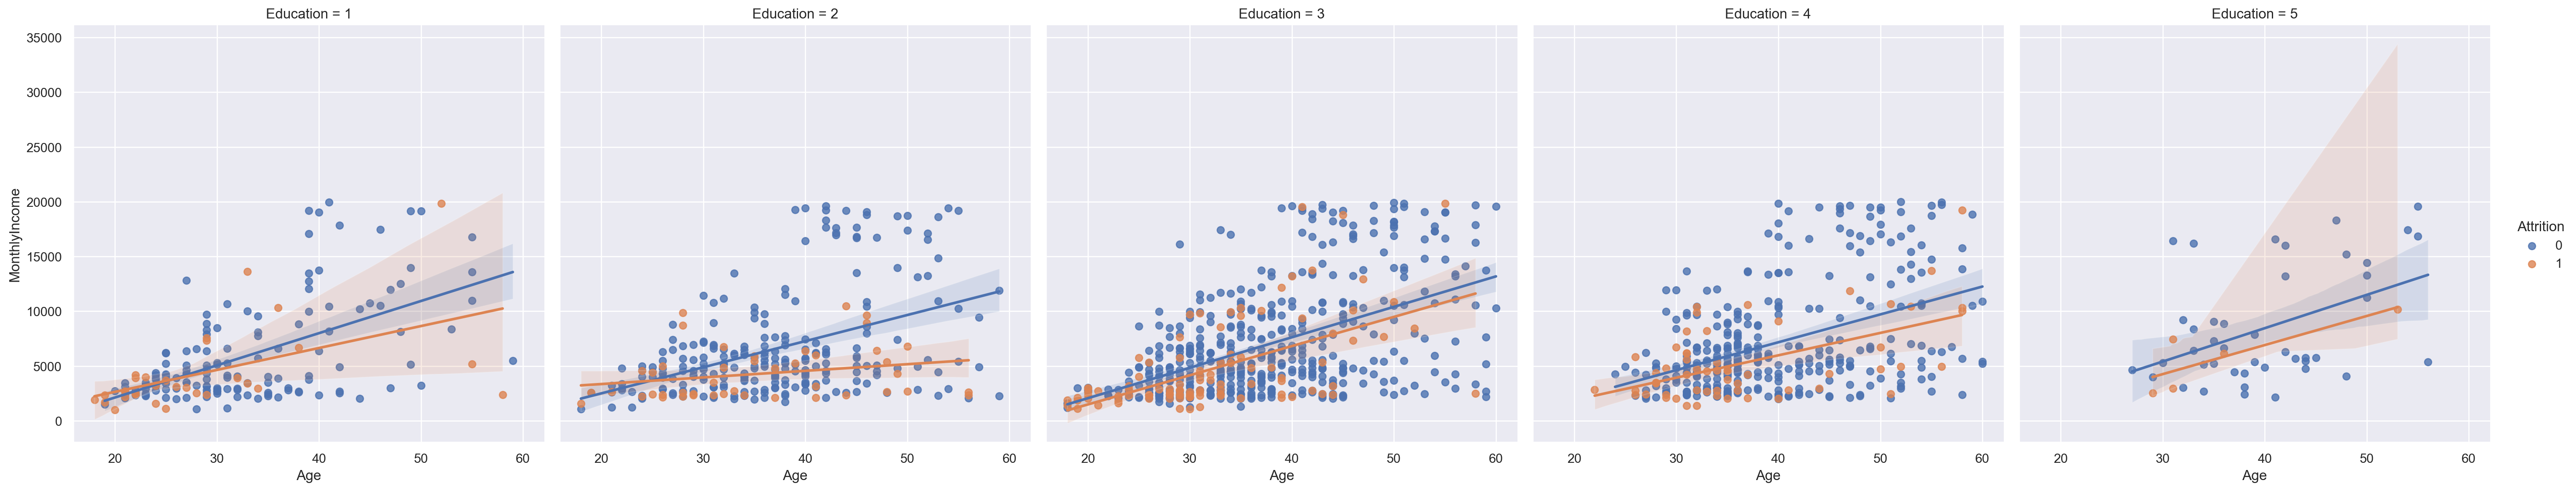

In [64]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(x="Age", y="MonthlyIncome", data=df, col="Education", hue="Attrition", height=6);

# Inference
## What are some of the factors that might explain attrition?

Ref: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [65]:
df1 = pd.get_dummies(data=df, columns=['Department','Education','EducationField','MaritalStatus'])
df1.head()

Age  Attrition  DistanceFromHome  EnvironmentSatisfaction  JobSatisfaction  \
0   41          1                 1                        2                4   
1   49          0                 8                        3                2   
2   37          1                 2                        4                3   
3   33          0                 3                        4                3   
4   27          0                 2                        1                2   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  \
0           5993                   8                1               6   
1           5130                   1                3              10   
2           2090                   6                3               0   
3           2909                   1                3               8   
4           3468                   9                3               2   

   Department_Human Resources  ...  Education_5  \
0                           0  ...            0   
1                           0  ...            0   
2                           0  ...            0   
3                           0  ...            0   
4                           0  ...            0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     0   
4                         0                       1                     0   

   EducationField_Technical Degree  MaritalStatus_Divorced  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 26 columns]

In [66]:
"""
Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
"""
target = 'Attrition'
cols_num = [
            'Age', 
            'DistanceFromHome',
            'EnvironmentSatisfaction',
            'JobSatisfaction',
            'MonthlyIncome',
            'NumCompaniesWorked',
            'WorkLifeBalance',
            'YearsAtCompany'
           ]
cols_cat = [
            'Department',
            'Education',
            'EducationField',
            'MaritalStatus'
           ]

In [67]:
for col in cols_cat:
    print(f"### {col}:\n{df[col].value_counts()}\n")

### Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Education:
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

### EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



In [68]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [69]:
encoded = encoder.fit_transform(df[cols_cat])
encoded[:5]

/Users/sayantansatpati/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0.]])

In [70]:
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_cat))
one_hot_df.head()

Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  Education_1  Education_2  Education_3  Education_4  \
0               1.0          0.0          1.0          0.0          0.0   
1               0.0          1.0          0.0          0.0          0.0   
2               0.0          0.0          1.0          0.0          0.0   
3               0.0          0.0          0.0          0.0          1.0   
4               0.0          1.0          0.0          0.0          0.0   

   Education_5  EducationField_Human Resources  EducationField_Life Sciences  \
0          0.0                             0.0                           1.0   
1          0.0                             0.0                           1.0   
2          0.0                             0.0                           0.0   
3          0.0                             0.0                           1.0   
4          0.0                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                       0.0                     0.0                   0.0   
1                       0.0                     0.0                   0.0   
2                       0.0                     0.0                   1.0   
3                       0.0                     0.0                   0.0   
4                       0.0                     1.0                   0.0   

   EducationField_Technical Degree  MaritalStatus_Divorced  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  
0                    0.0                   1.0  
1                    1.0                   0.0  
2                    0.0                   1.0  
3                    1.0                   0.0  
4                    1.0                   0.0

In [71]:
df[cols_num].head()

Age  DistanceFromHome  EnvironmentSatisfaction  JobSatisfaction  \
0   41                 1                        2                4   
1   49                 8                        3                2   
2   37                 2                        4                3   
3   33                 3                        4                3   
4   27                 2                        1                2   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [72]:
X = pd.concat([df[cols_num], one_hot_df], axis=1)
y = df[target]
print(X.shape, y.shape)

(1470, 25) (1470,)


## Using sklearn Logistic Regression

In [73]:
# Initializing the Logistic Regression model
lr = LogisticRegression(solver='liblinear')

# Fitting the model on the training data
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [74]:
print(f"Model Accuracy: {lr.score(X, y)}")

Model Accuracy: 0.8496598639455782


In [75]:
coefficients = lr.coef_[0]  # Extract coefficients
feature_names = X.columns  # Extract feature names

# Pairing coefficients with feature names
coefficients_df = pd.DataFrame({
                                'Feature': feature_names, 
                                'logodds': coefficients, 
                                'odds': np.exp(coefficients),
                                'probability': np.exp(coefficients) / (1+np.exp(coefficients))
                               })
print(f"\nIntercept: {lr.intercept_[0]}")
print(coefficients_df.sort_values(by=['probability'], ascending=False).reset_index(drop=True))


Intercept: 0.2793590733915659
                              Feature   logodds      odds  probability
0                MaritalStatus_Single  0.791123  2.205873     0.688072
1                    Department_Sales  0.359476  1.432579     0.588914
2     EducationField_Technical Degree  0.338162  1.402368     0.583744
3            EducationField_Marketing  0.197262  1.218063     0.549156
4                         Education_3  0.170040  1.185352     0.542408
5                  NumCompaniesWorked  0.116073  1.123078     0.528986
6      EducationField_Human Resources  0.111386  1.117826     0.527818
7                         Education_1  0.106992  1.112925     0.526722
8          Department_Human Resources  0.086068  1.089880     0.521504
9                         Education_2  0.052283  1.053674     0.513068
10                   DistanceFromHome  0.035183  1.035809     0.508795
11                        Education_4  0.002096  1.002098     0.500524
12                      MonthlyIncome -0.00010

# Interpretation of Logistic Regression coefficients 

p = P(y=1), 1-p = P(y=0)

logit/logodds(p) = log(p/(1-p)) = b + b1*x1 + b2*x2 + ... bn*xn

odds = p/(1-p) = exp(logodds)

probablity = exp(logodds) / (1+exp(logodds))

Taking MaritalStatus_Single as an example: 
if MaritalStatus is Single: 
- Increases the logit/logodds of attrition by 0.791123
- Increases the odds of attrition by 2.205873
- Increases the probability of attrition by 0.688072

## Using statsmodel Logistic Regression (Another way)

In [76]:
logit_mod = sm.Logit(y, sm.add_constant(X))

In [77]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.377739
         Iterations 7


In [78]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           21
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.1448
Time:                        12:19:40   Log-Likelihood:                -555.28
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.069e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.0193   4.26e+06   2.39e-07      1.000   -8.34e+06    8.34e+06
Age                                  -0.0352      0.011     -3

## Using sklearn Decision Tree (ensemble) 

In [79]:
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [80]:
print(f"Model Accuracy: {gbdt.score(X, y)}")

Model Accuracy: 0.8993197278911564


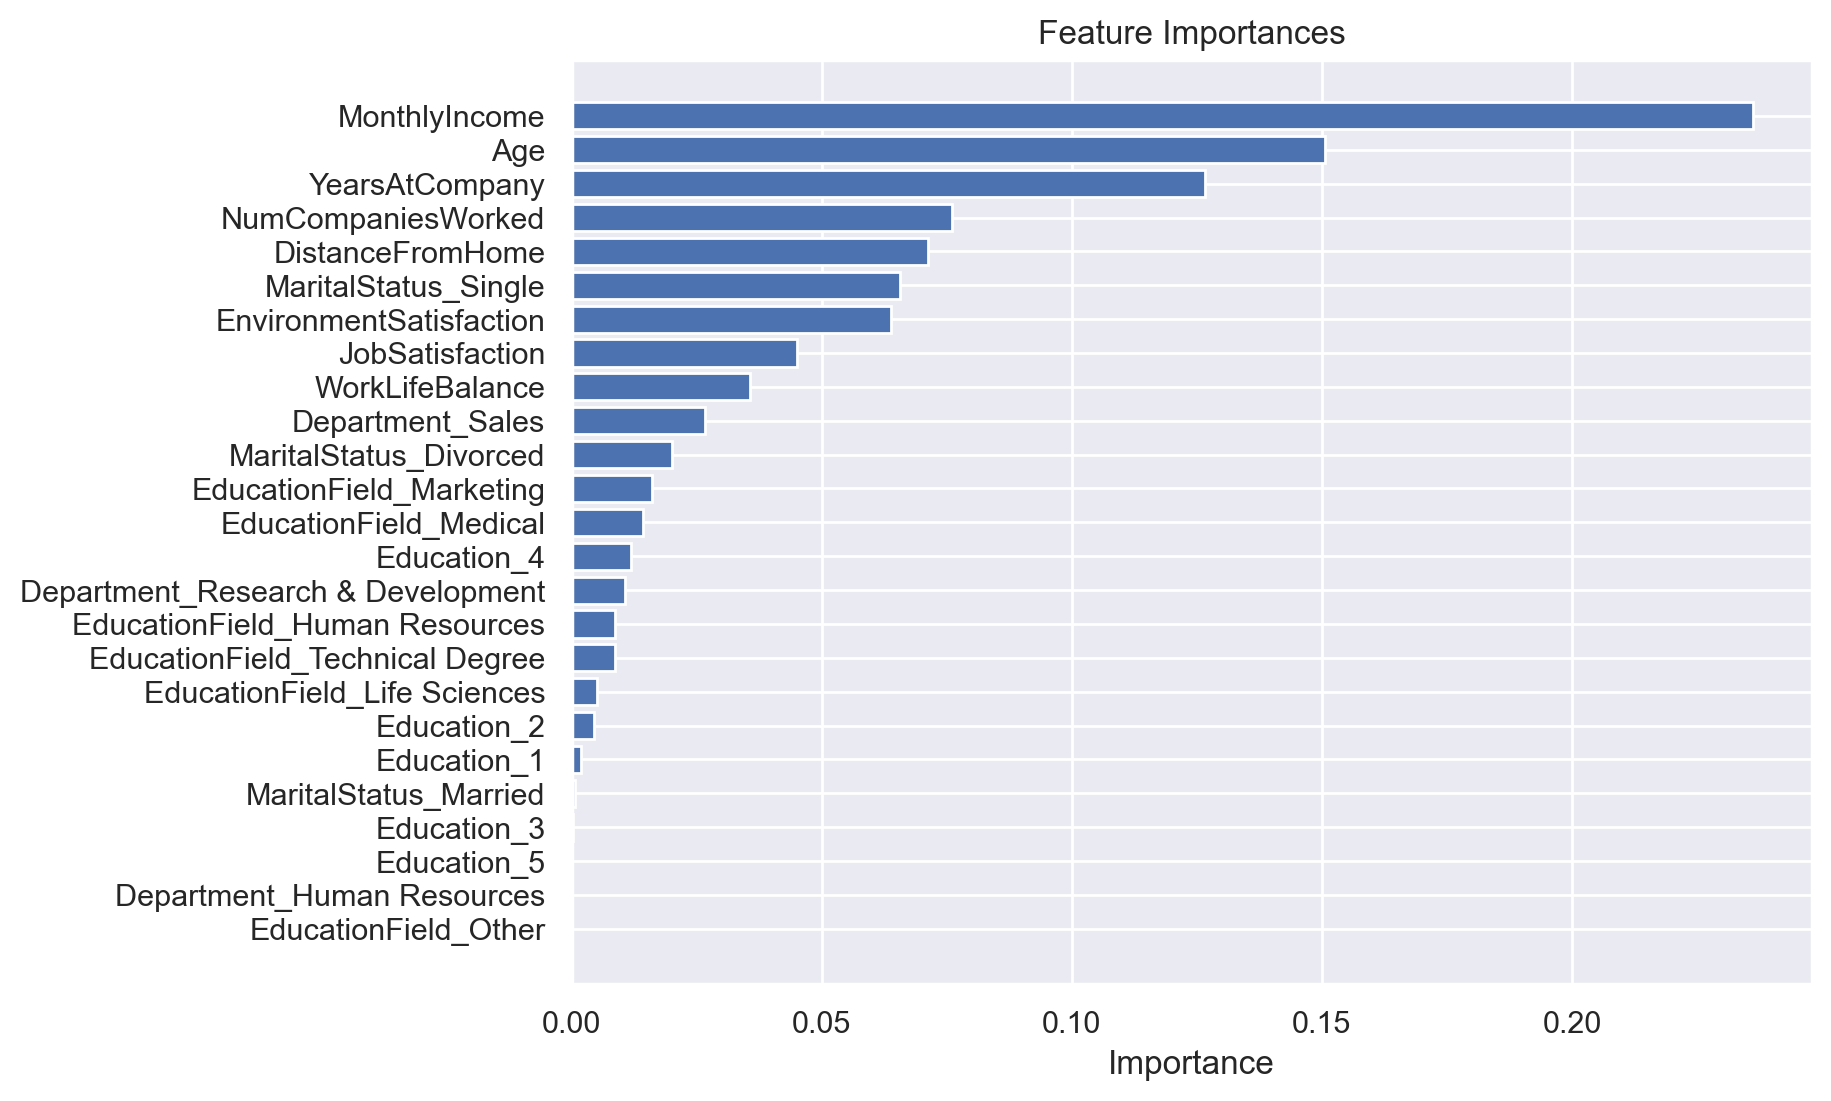

In [81]:
# Get feature importances
importances = gbdt.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()